# Problem Statement

As a senior ML Engineer, you are asked to build a model that will improve the recommendations given to the users given their past reviews and ratings. 

 

In order to do this, you planned to build a sentiment-based product recommendation system, which includes the following tasks.
- Data sourcing and sentiment analysis
- Building a recommendation system
- Improving the recommendations using the sentiment analysis model
- Deploying the end-to-end project with a user interface

## Pipeline that needs to be performed

1. Data loading

2. Data cleaning and EDA

3. Text Preprocessing

4. Feature extraction

5. Model building using supervised learning

6. Building a recommendation System

7. Improving the recommendations using the sentiment analysis model

8. Deployment of this end to end project with a user interface using Flaskapi and Heroku

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install wordcloud
!pip install swifter
!pip install textblob
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 658 kB 32.4 MB/s 
     |████████████████████████████████| 281 kB 50.1 MB/s 
     |████████████████████████████████| 140 kB 26.3 MB/s 
  Created wheel for swifter: filename=swifter-1.2.0-py3-none-any.whl size=14498 sha256=8bf2ac8b67ba729719873ca954c953fc2dab8245a454dcab0516a11d5d43d4e5
  Stored in directory: /root/.cache/pip/wheels/b9/c9/ba/10a8fa98de369cd9ed7ff820e6a174cb63a30056b838a0150e
Successfully built swifter
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# import required libraries

import pandas as pd,numpy as np
from numpy import *
pd.set_option('max_rows',100)
pd.set_option('max_columns',50)
pd.options.display.max_colwidth = 80

import os
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt,seaborn as sns
%matplotlib inline

# libraries for text processing
import string,re,swifter #swifter for faster processing of fucntion on pandas datafrane.
from textblob import TextBlob
from collections import Counter
import imblearn
from imblearn.over_sampling import SMOTE
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords,wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('tagsets')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
from nltk import FreqDist
from wordcloud import WordCloud,STOPWORDS

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer , TfidfTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
import time,pickle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics.pairwise import pairwise_distances,cosine_similarity

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


#  1. Data loading

In [7]:
#import required libraries
data  = pd.read_csv(r'/content/drive/MyDrive/dataset/dataset.csv')

#dimension of the dataframe 
print('dataframe has {} rows and {} columns'.format(str(data.shape[0]),str(data.shape[1])))

dataframe has 30000 rows and 15 columns


In [8]:
#print the column names
for i,col in enumerate(data.columns.to_list()):
  print(i, ' --> ',col)

0  -->  id
1  -->  brand
2  -->  categories
3  -->  manufacturer
4  -->  name
5  -->  reviews_date
6  -->  reviews_didPurchase
7  -->  reviews_doRecommend
8  -->  reviews_rating
9  -->  reviews_text
10  -->  reviews_title
11  -->  reviews_userCity
12  -->  reviews_userProvince
13  -->  reviews_username
14  -->  user_sentiment


In [9]:
data.sample(n=10)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
28748,AVpfUN2nilAPnD_xZeY3,Meguiars,"Home,Home Improvement,Automotive,Car Cleaning,Auto & Tires,Automotive Tools ...",Meguiars,Meguiars Interior Detailer Wipes 25ct,2017-05-23T05:23:25.000Z,NaN,True,5,These work well to remove smudges and marks on the solid surfaces inside my ...,NaN,NaN,NaN,laura w,Positive
13913,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-P...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,2015-02-17T00:00:00.000Z,False,True,5,I use clorox every where from the laundry to wiping counters and cleaning th...,love my clean,NaN,NaN,stacie14,Positive
25923,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventure,Movies & Music,Movies & TV S...",Test,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,2014-12-26T00:00:00.000Z,NaN,True,5,Great action Science Fiction movie full of action this Godzilla 2014.,Good Fiction movie,NaN,NaN,crystalmycutie0918,Positive
4953,AVpf0eb2LJeJML43EVSt,Sony Pictures,"Movies, Music & Books,Ways To Shop Entertainment,Movie & Tv Box Sets,Movies,...",SONY CORP,The Resident Evil Collection 5 Discs (blu-Ray),2016-12-15T00:00:00.000Z,NaN,True,5,This Resident Evil movie is a great collection just wish it had digital copy.,Great Movie,NaN,NaN,hulksmash,Negative
12808,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-P...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,2015-01-06T00:00:00.000Z,False,True,5,I love these wipes they have been great for years! This review was collected...,great,NaN,NaN,skladj,Positive
18720,AVpfJP1C1cnluZ0-e3Xy,Clorox,"Household Chemicals,Household Cleaners,Bath & Shower Cleaner,Household Essen...",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner,2012-01-30T00:00:00.000Z,False,True,4,I am a busy mom always on the go. The wipes are not only convenient but give...,Ease of use is important,NaN,NaN,kim2866,Positive
18546,AVpfJcHuLJeJML433ZrY,Lionsgate Home Entertainment,"Movies, Music & Books,Movies,Sci-Fi & Fantasy,Romance,Movies & TV,Blu-ray,Do...",Lions Gate,Equals (blu-Ray),2016-10-14T00:00:00.000Z,NaN,True,3,It's your typical no emoting dystopia movie. Hoult and Stewart pull decent p...,Nothing entirely new here,NaN,NaN,batmanny,Positive
6490,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-P...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,2012-01-26T00:00:00.000Z,False,True,1,"I was expecting these wipes to have a strong clorox smell but they don't, th...",Excellent Product,NaN,NaN,cass,Positive
26262,AVpfPnrU1cnluZ0-g9rL,Lionsgate,"Movies, Music & Books,Movies,Sci-Fi & Fantasy,Movies & TV,Instawatch Movies ...",Lions Gate,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),2009-05-01T00:00:00.000Z,NaN,False,2,"Ok, for everybody out there. Stargate is a great movie. If you haven't seen ...",What a way to trash a great movie.,NaN,NaN,soulsabr,Positive
10359,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-P...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,2012-01-26T00:00:00.000Z,False,True,5,"I've tried several brands, but Clorox wipes are by far the best! This scent ...",Best wipes out there!,NaN,NaN,juliet,Positive


In [10]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [11]:
#check for any duplicates
data.drop_duplicates(inplace=True)
data.shape

(30000, 15)

# 2. Data cleaning and EDA

In [12]:
#check the NaN values in all columns
def checkNaNvalues(df):
    return round(100*(df.isnull().sum()/len(df.index)), 2)

In [13]:
checkNaNvalues(data)

id                       0.00
brand                    0.00
categories               0.00
manufacturer             0.47
name                     0.00
reviews_date             0.15
reviews_didPurchase     46.89
reviews_doRecommend      8.57
reviews_rating           0.00
reviews_text             0.00
reviews_title            0.63
reviews_userCity        93.57
reviews_userProvince    99.43
reviews_username         0.21
user_sentiment           0.00
dtype: float64

we can see that more than 90% of records are null in reviews_userCity and reviews_userProvince columns so it is better to drop these two columns

In [14]:
data.drop(columns=['reviews_userCity','reviews_userProvince'],inplace=True)
data.shape

(30000, 13)

In [15]:
#check the rating distribution in percentage
round(100*data.reviews_rating.value_counts()/len(data.reviews_rating.index),2)

5    69.44
4    20.07
1     4.61
3     4.48
2     1.40
Name: reviews_rating, dtype: float64

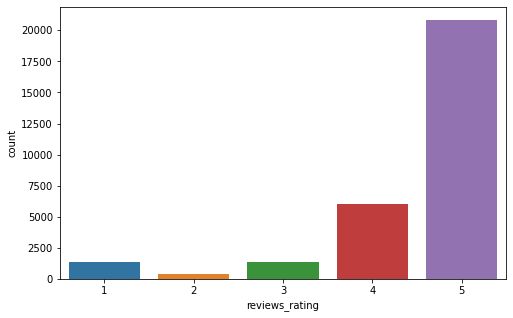

In [16]:
#plot distribution of reviews rating-wise
plt.figure(figsize=(8,5))
ax = sns.countplot(x='reviews_rating', data=data)

In [17]:
#let's check the distribution of the user sentiments for all reviews
#distribution of user sentiments in percentage
for i in range(len(data.user_sentiment.value_counts().to_list())):
    print(data.user_sentiment.value_counts().index[i] + ' user sentiments across all reviews are {0}'.format(round(100*data.user_sentiment.value_counts()[i]/len(data.user_sentiment.index),2))+'%')

Positive user sentiments across all reviews are 88.77%
Negative user sentiments across all reviews are 11.22%


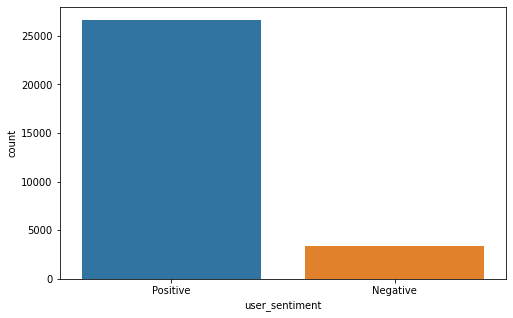

In [18]:
##plot the distribution of user sentiments using countplot
plt.figure(figsize=(8,5))
ax = sns.countplot(x='user_sentiment', data=data)

88% user have given positive reviews for the products of various categories.

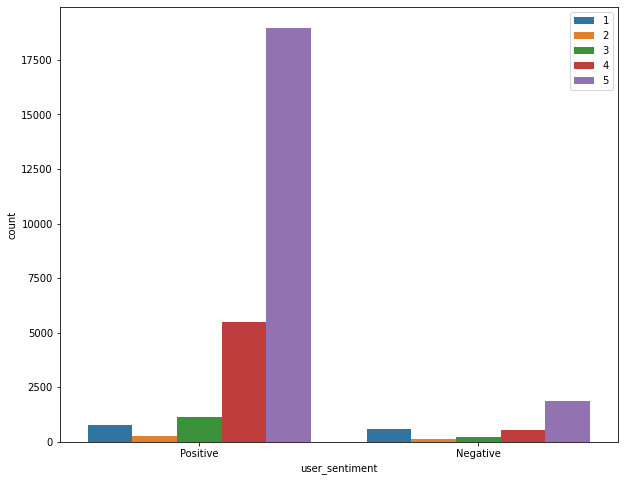

In [19]:
#plot the distribution of user sentiments rating wise
plt.figure(figsize=(10,8))
ax = sns.countplot(x="user_sentiment",
                hue="reviews_rating",
                data=data);
ax.legend(loc = 'upper right')

it is clear that distribution of rating is not same for both positive and negative sentiments. This is clear case of class imbalance which we need to handle.
We can also see that user sentiment is positive but he has given less than 3 rating and we also can see that some user sentiments are negative but they have given rating of more than 3.It can also be proved using below data

In [20]:
data.groupby(['user_sentiment','reviews_rating'])['user_sentiment'].count()

user_sentiment  reviews_rating
Negative        1                   597
                2                   140
                3                   220
                4                   550
                5                  1860
Positive        1                   787
                2                   280
                3                  1125
                4                  5470
                5                 18970
Name: user_sentiment, dtype: int64

In [21]:
#create a crosstable to see the ratings given for both user sentiment
pd.crosstab(data.user_sentiment,data.reviews_rating,margins=True)

reviews_rating,1,2,3,4,5,All
user_sentiment,,,,,,
Negative,597,140,220,550,1860,3367
Positive,787,280,1125,5470,18970,26632
All,1384,420,1345,6020,20830,29999


we can correct this abnormality by giving positive sentiment for all reviews where rating was greater than 3 and negative sentiment where rating was less than 3

In [22]:
data.loc[(data.user_sentiment=='Positive') & (data.reviews_rating < 4),'user_sentiment'] = 'Negative'
data.loc[(data.user_sentiment=='Negative') & (data.reviews_rating > 3),'user_sentiment'] = 'Positive'

In [23]:
pd.crosstab(data.user_sentiment,data.reviews_rating,margins=True)

reviews_rating,1,2,3,4,5,All
user_sentiment,,,,,,
Negative,1384,420,1345,0,0,3149
Positive,0,0,0,6020,20830,26850
All,1384,420,1345,6020,20830,29999


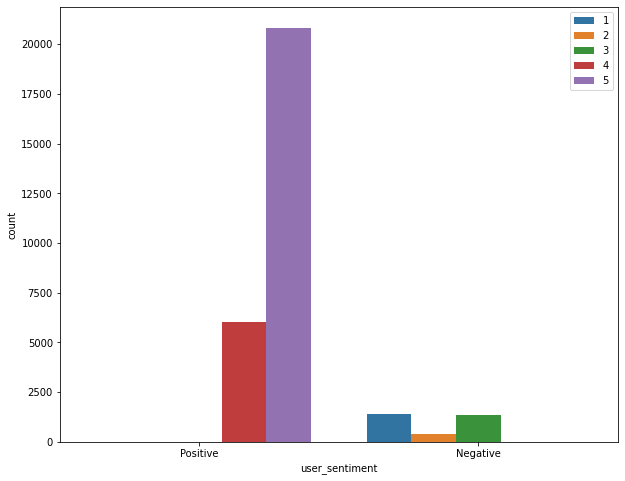

In [24]:
#plot the distribution of user sentiments rating wise again after correcting sentiments based on ratings
plt.figure(figsize=(10,8))
ax = sns.countplot(x="user_sentiment",
                hue="reviews_rating",
                data=data);
ax.legend(loc = 'upper right')

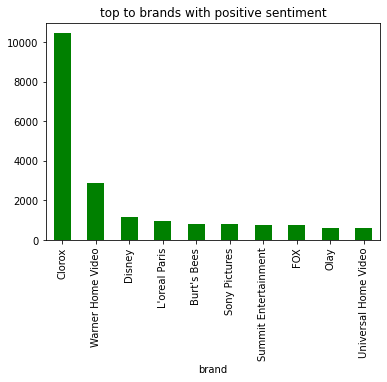

In [25]:
#get the top 10 brands with positive sentiments
data.loc[data.user_sentiment=='Positive'].groupby(['brand'])['brand'].count().sort_values(ascending=False).head(10).plot(kind='bar',color='g',title='top to brands with positive sentiment')

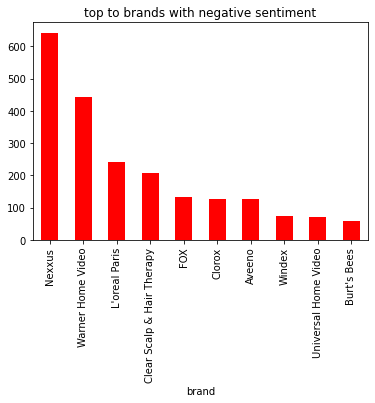

In [26]:
#get the top 10 brands with negative sentiments
data.loc[data.user_sentiment=='Negative'].groupby(['brand'])['brand'].count().sort_values(ascending=False).head(10).plot(kind='bar',color='r',title='top to brands with negative sentiment')

In [27]:
#check null value percentage again for all columns
checkNaNvalues(data)

id                      0.00
brand                   0.00
categories              0.00
manufacturer            0.47
name                    0.00
reviews_date            0.15
reviews_didPurchase    46.89
reviews_doRecommend     8.57
reviews_rating          0.00
reviews_text            0.00
reviews_title           0.63
reviews_username        0.21
user_sentiment          0.00
dtype: float64

In [28]:
#remove records where username is not available
data = data.loc[~data.reviews_username.isnull()]

In [29]:
#check NaN records
checkNaNvalues(data)

id                      0.00
brand                   0.00
categories              0.00
manufacturer            0.47
name                    0.00
reviews_date            0.13
reviews_didPurchase    46.78
reviews_doRecommend     8.49
reviews_rating          0.00
reviews_text            0.00
reviews_title           0.63
reviews_username        0.00
user_sentiment          0.00
dtype: float64

In [30]:
#function for aligning dataframe columns to left
def dframe_alignment(table):
    return table.style.set_properties(**{'text-align': 'left'}).set_table_styles([ dict(selector='th', props=[('text-align', 'left')] ) ])

In [31]:
# for the sentiment analysis not all the columns are required. We will use only those columns which are useful for our analysis.
df = data[['id','name','reviews_rating','reviews_username','reviews_text','reviews_title','user_sentiment']]
dframe_alignment(df.sample(n=10))


,id,name,reviews_rating,reviews_username,reviews_text,reviews_title,user_sentiment
16518,AVpf63aJLJeJML43F__Q,"Burt's Bees Lip Shimmer, Raisin",5,bargainshopper,I bought both colors Cherry Raisin Lip Shimmer. I love the size of the lip shimmer tube and it is very easy to carry in any size purse. The texture of this lip shimmer goes on very smooth and has a hint of peppermint flavor when it glides on your chapped lips. I love the subtle colors of Cherry Raisin used separately but can be mixed together. I highly recommend this lip shimmer and will buy other colors when I run out of these two colors. This review was collected as part of a promotion.,Love Cherry Raisin Lip Shimmer,Positive
12782,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,5,jpeace,I like the wipes they are easy to use and disinfect This review was collected as part of a promotion.,clorox wipes,Positive
3293,AVpe5JOgilAPnD_xQPfE,The Script - No Sound Without Silence (cd),4,slsk,"Just got this one still pretty fresh to me yet, but it is growing on me. There is a few songs that I know and like. Others I don't but so far not to bad.",love thia band and many of thier albums undecided,Positive
5594,AVpf2tw1ilAPnD_xjflC,Red (special Edition) (dvdvideo),3,yanks2k14,"Bought it on Black Friday, so the price was great. I like the movie as an easy to watch, typical shoot'em up movie.",Good movie to kill a couple hours,Negative
614,AV1l8zRZvKc47QAVhnAv,Olay Regenerist Deep Hydration Regenerating Cream,5,butterfly75,"I started with the total effects and it worked wonders but as I got older I decided to try more intensive treatment. The Regenerist moisturizer is great. i have had people come up at work and say What kind of makeup if you do wear makeup do you use I have been told without makeup that my skin is translucent. The scent is so fresh and the cream seems to even my skin out without foundation, If you can at all, buy this and see how long it lasts and how much good it does. I don't think you will be disappointed.",I love the regenerist moisturizer,Positive
16581,AVpf63aJLJeJML43F__Q,"Burt's Bees Lip Shimmer, Raisin",5,hikachu,I love this!! smells very nice and color is super cute too.,love love this!!,Positive
28214,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),5,babycakes,I think planes fire and rescue was better then planes one,my movie review,Positive
27852,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),5,harleychick,Our son absolutely loves this movie he has watched it 1 million times. It has a very cute storyline to it.,The planes movie,Positive
21823,AVpfm8yiLJeJML43AYyu,Nexxus Exxtra Gel Style Creation Sculptor,5,janeth,"Absolutely excellent item, strong hold and great price and secure packaging!!!",Outstanding Item,Positive
20311,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,5,mcknost,"I love having several containers of Clorox wipe around, especially during flu season. I even keep a container in my car to wipe down restaurant high chairs, grocery carts, etc.",Great for kids,Positive


In [32]:
#dimension of the dataframe
df.shape

(29937, 7)

In [33]:
#let's merger reviews_text and reviews_title to one column and then remove the original columns
#before that fill all null records of reviews_title with ' '
df.reviews_title = df.reviews_title.fillna(' ')
df['reviewsText'] = df.reviews_title + '. ' + df.reviews_text
reviewsData  = df.drop(columns=['reviews_text','reviews_title'])
reviewsData.reviewsText = reviewsData.reviewsText.str.lstrip('. ')
dframe_alignment(reviewsData.sample(n=10))



,id,name,reviews_rating,reviews_username,user_sentiment,reviewsText
25404,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,5,infamous,Positive,Great. The movie and acting was incredibly awesome. Good pick
11970,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,5,shayy,Positive,Awesome product. I am so obsessed with these wipes! I use them all around the house! I use them to wipe down countertops to wipe down the bathroom and to clean the table. They clean great and smell awesome! This review was collected as part of a promotion.
9086,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,5,jmtw,Positive,Used A Long Time. I have always used Clorox products as a way to get rid of harmful germs. This review was collected as part of a promotion.
25792,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,5,winkster,Positive,Fun movie great special effects. I really enjoyed the movie and the twists. Special effects were great!
10414,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,5,lady2053,Positive,"Excellent Product. Love Clorox wipes because they are convenient, a powerful cleaning agent as well as disinfects. This review was collected as part of a promotion."
24122,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,4,jasmine,Positive,"great movie godzilla always good. story line good, special effects were really great. the monsters just jumped out of the screen at you"
7267,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,4,mom22in80,Positive,Great Product!. Clorox disinfecting wipes are my go to cleaner to make sure my home is clean and germ free. I use them for anything from wiping down countertops to door knobs and telephones. They are a great addition to my cleaning arsenal! This review was collected as part of a promotion.
25463,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,5,burrfan55,Positive,A new vision with respect. This film pays tribute and remembers Godzilla's rich cinematic history. It is has all the edge and excitement of modern special effects but the story to back it as well. So many nods to the classics. worth the bluray!
6307,AVpf385g1cnluZ0-s0_t,"Hormel Chili, No Beans",4,modernoldlady,Positive,"OK. I look for brands I like . but can't always get them as quantities are too large. This isn't as spiced as I like, but Wolfe Brand is all sauce and little meat now."
9010,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,5,dakola,Positive,"Powerful. Love the wipes. Prefer to use them all the time, easy to use. This review was collected as part of a promotion."


In [34]:
#dimension of the dataframe 
reviewsData.shape

(29937, 6)

In [35]:
#check user_sentiments distribution after removing NaN records
reviewsData.user_sentiment.value_counts()

Positive    26801
Negative     3135
Name: user_sentiment, dtype: int64

In [36]:
#check the record for which user sentiment is null and fill it based on it's review text
reviewsData.loc[reviewsData.user_sentiment.isna()]

,id,name,reviews_rating,reviews_username,user_sentiment,reviewsText
28354,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),5,7.87E+11,NaN,a super hit with my children. they loved it!!??. my kids absolutely loved th...


In [37]:
#looking at the review text looks like it is a positive sentiment.Filling the usersentiment with 'Positive'
reviewsData.loc[reviewsData.user_sentiment.isna(),'user_sentiment'] = 'Positive'

In [38]:
#check for NaN records in the dataframe again
checkNaNvalues(reviewsData)

id                  0.0
name                0.0
reviews_rating      0.0
reviews_username    0.0
user_sentiment      0.0
reviewsText         0.0
dtype: float64

In [39]:
#check the distribution of user_sentiments again
reviewsData.user_sentiment.value_counts()

Positive    26802
Negative     3135
Name: user_sentiment, dtype: int64

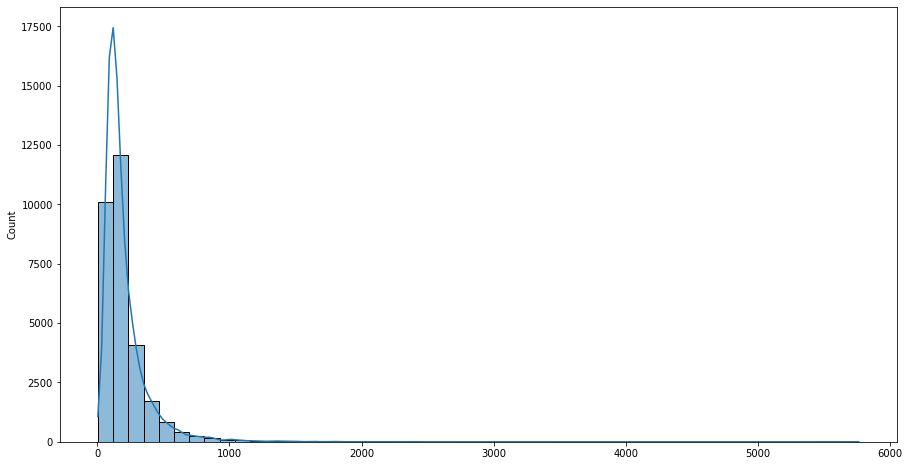

In [40]:
#plot hist to check the avg review length
char_length = [len(review) for review in reviewsData.reviewsText]

plt.figure(figsize=(15,8))
sns.histplot(data=char_length,bins=50,stat='count',kde=True)
plt.show()

We can see that majority of the reviews are in length of between 0 to 1000

# 3. Text processing

In [41]:
#create text processing function 
def textProcessing(text):
    '''
        This function parses a text and do the following.
        - Make the text lowercase
        - Remove whitespaces from both end of the string
        - Remove text in square brackets
        - Remove punctuation
        - Remove words containing numbers
    '''
    text = text.lower() # convert text to lower case
    text = text.strip() # remove whitespaces from both end of the string
    text = re.sub('\[.*?\]','',text) # remove text in square brackets
    text = re.sub('[%s]'%re.escape(string.punctuation),'',text) # remove string.punctuations(!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~) from the text
    #for removing punctuation you can also use str,maketrans(''.'',string.punctuation). it's just that re.sub is faster than maketrans
    text = re.sub('\w*\d\w*','',text) #remove words containing numbers
    return text
    

In [42]:
dframe_alignment(reviewsData.head(10))

,id,name,reviews_rating,reviews_username,user_sentiment,reviewsText
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua,Positive,Just Awesome. i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,Positive,Good. Good flavor. This review was collected as part of a promotion.
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,Positive,Good. Good flavor.
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,rebecca,Negative,"Disappointed. I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensation we had both been expecting. I'm disappointed that I paid as much as I did for a lube that I won't use again, when I could just use their normal personal lubricant for 1) less money and 2) less mess."
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,walker557,Negative,Irritation. My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.
5,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,samantha,Negative,Not worth it. My boyfriend and I bought this to spice things up in the bedroom and we were both highly disappointed in this product. We bought this one because we absolutely love the ky yours and mine and we thought this would have a similar affect but it did absolutely nothing. Do not buy.
6,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,raeanne,Negative,Disappointing. Bought this earlier today and was excited to check it out. Based on the product description I was expecting something but it was just like the regular KY. We are fans of the his and hers so we just expected more and were left a little disappointed.
7,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,kimmie,Negative,Not happy at all. I bought this product for my husband and I to try and we were not impressed at all. There was no tingling or warming. It left us both very sticky. I have used KY products in the past (loved KY his and hers) but this one was disappointing.
8,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,cassie,Negative,Very disappointing. My husband and I bought this for some extra fun. We werevboth extremely disappointed. Especially for the price! Do not waste your money on this product. We felt nothing but a sticky mess from it.
9,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,moore222,Negative,Don't buy. Got as a surprise for my husband there is nothing special about it just a lube save the money and get plain KY if you just need a lube wish I could return it for a refund


In [43]:
reviewsData['reviews'] = reviewsData.reviewsText.swifter.apply(lambda x : textProcessing(x))
dframe_alignment(reviewsData.head(10))

Pandas Apply:   0%|          | 0/29937 [00:00<?, ?it/s]

,id,name,reviews_rating,reviews_username,user_sentiment,reviewsText,reviews
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua,Positive,Just Awesome. i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,just awesome i love this album its very good more to the hip hop side than her current pop sound so hype i listen to this everyday at the gym i give it rating all the way her metaphors are just crazy
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,Positive,Good. Good flavor. This review was collected as part of a promotion.,good good flavor this review was collected as part of a promotion
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,Positive,Good. Good flavor.,good good flavor
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,rebecca,Negative,"Disappointed. I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensation we had both been expecting. I'm disappointed that I paid as much as I did for a lube that I won't use again, when I could just use their normal personal lubricant for 1) less money and 2) less mess.",disappointed i read through the reviews on here before looking in to buying one of the couples lubricants and was ultimately disappointed that it didnt even live up to the reviews i had read for starters neither my boyfriend nor i could notice any sort of enhanced or captivating sensation what we did notice however was the messy consistency that was reminiscent of a more liquidy vaseline it was difficult to clean up and was not a pleasant especially since it lacked the captivating sensation we had both been expecting im disappointed that i paid as much as i did for a lube that i wont use again when i could just use their normal personal lubricant for less money and less mess
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,walker557,Negative,Irritation. My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,irritation my husband bought this gel for us the gel caused irritation and it felt like it was burning my skin i wouldnt recommend this gel
5,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,samantha,Negative,Not worth it. My boyfriend and I bought this to spice things up in the bedroom and we were both highly disappointed in this product. We bought this one because we absolutely love the ky yours and mine and we thought this would have a similar affect but it did absolutely nothing. Do not buy.,not worth it my boyfriend and i bought this to spice things up in the bedroom and we were both highly disappointed in this product we bought this one because we absolutely love the ky yours and mine and we thought this would have a similar affect but it did absolutely nothing do not buy
6,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,raeanne,Negative,Disappointing. Bought this earlier today and was excited to check it out. Based on the product description I was expecting something but it was just like the regular KY. We are fans of the his and hers so we just expected more and were left a little disappointed.,disappointing bought this earlier today and was excited to check it out based on the product description i was expecting something but it was just like the regular ky we are fans of the his and hers so we just expected more and were left a little disa

In [44]:
#remove stop words from the text
stopWords = set(stopwords.words('english'))
def removeStopwords(text):
    words = [word for word in text.split() if word.isalpha() and word not in stopWords]
    return " ".join(words)

In [45]:
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [46]:
#remove stopwords and lematize text 
lemmatizer = WordNetLemmatizer()
def textLemmatize(text):
    #remove the stopwords from the text
    words = removeStopwords(text)
    #map pos tags of each words
    wordnetPOSTags =  nltk.pos_tag(word_tokenize(words))
    #lemmatize the words according to their POS tag
    lemmatizedWords = [lemmatizer.lemmatize(token[0],get_wordnet_pos(token[1])) for i,token in enumerate(wordnetPOSTags)]
    return " ".join(lemmatizedWords)
     

In [47]:
reviewsData.reviews = reviewsData.reviews.swifter.apply(lambda x: textLemmatize(x))
dframe_alignment(reviewsData.head(10))

Pandas Apply:   0%|          | 0/29937 [00:00<?, ?it/s]

,id,name,reviews_rating,reviews_username,user_sentiment,reviewsText,reviews
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua,Positive,Just Awesome. i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,awesome love album good hip hop side current pop sound hype listen everyday gym give rating way metaphor crazy
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,Positive,Good. Good flavor. This review was collected as part of a promotion.,good good flavor review collect part promotion
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,Positive,Good. Good flavor.,good good flavor
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,rebecca,Negative,"Disappointed. I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensation we had both been expecting. I'm disappointed that I paid as much as I did for a lube that I won't use again, when I could just use their normal personal lubricant for 1) less money and 2) less mess.",disappoint read review look buy one couple lubricant ultimately disappointed didnt even live review read starter neither boyfriend could notice sort enhanced captivate sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lack captivate sensation expect im disappoint pay much lube wont use could use normal personal lubricant less money less mess
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,walker557,Negative,Irritation. My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,irritation husband buy gel u gel caused irritation felt like burn skin wouldnt recommend gel
5,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,samantha,Negative,Not worth it. My boyfriend and I bought this to spice things up in the bedroom and we were both highly disappointed in this product. We bought this one because we absolutely love the ky yours and mine and we thought this would have a similar affect but it did absolutely nothing. Do not buy.,worth boyfriend bought spice thing bedroom highly disappointed product buy one absolutely love ky mine think would similar affect absolutely nothing buy
6,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,raeanne,Negative,Disappointing. Bought this earlier today and was excited to check it out. Based on the product description I was expecting something but it was just like the regular KY. We are fans of the his and hers so we just expected more and were left a little disappointed.,disappoint buy earlier today excite check base product description expect something like regular ky fan expect left little disappointed
7,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,kimmie,Negative,Not happy at all. I bought this product for my husband and I to try and we were not impressed at all. There was no tingling or warming. It left us both very sticky. I have used KY products in the past (loved KY his and hers) but this one was disappointing.,happy buy product husband try impress tingle warm leave u sticky use ky product past loved ky one disappointing
8,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,cassie,Negative,Very disappointing. My husband and I bought this for some extra fun. We werevboth extremely disappointed. Especially for the price! Do not waste your money on this 

In [48]:
#Write your function to extract the POS tags 

def pos_Tag(text):
  #TextBlob provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more
  blob = TextBlob(text)
  return " ".join([word for (word,tag) in blob.tags if tag in ['JJ','JJR','JJS','NN']])

In [49]:
reviewsData['finalReviews'] = reviewsData.reviews.swifter.apply(lambda x : pos_Tag(x))
dframe_alignment(reviewsData.head(10))

Pandas Apply:   0%|          | 0/29937 [00:00<?, ?it/s]

,id,name,reviews_rating,reviews_username,user_sentiment,reviewsText,reviews,finalReviews
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua,Positive,Just Awesome. i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,awesome love album good hip hop side current pop sound hype listen everyday gym give rating way metaphor crazy,awesome love album good hip hop side current pop sound hype listen everyday gym give rating way metaphor crazy
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,Positive,Good. Good flavor. This review was collected as part of a promotion.,good good flavor review collect part promotion,good good flavor review part promotion
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,Positive,Good. Good flavor.,good good flavor,good good flavor
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,rebecca,Negative,"Disappointed. I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensation we had both been expecting. I'm disappointed that I paid as much as I did for a lube that I won't use again, when I could just use their normal personal lubricant for 1) less money and 2) less mess.",disappoint read review look buy one couple lubricant ultimately disappointed didnt even live review read starter neither boyfriend could notice sort enhanced captivate sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lack captivate sensation expect im disappoint pay much lube wont use could use normal personal lubricant less money less mess,disappoint review look couple lubricant disappointed review starter boyfriend sort captivate sensation notice messy consistency reminiscent liquidy vaseline difficult clean pleasant lack captivate sensation im disappoint pay much lube wont use normal personal lubricant less money less mess
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,walker557,Negative,Irritation. My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,irritation husband buy gel u gel caused irritation felt like burn skin wouldnt recommend gel,irritation husband gel u gel irritation burn wouldnt gel
5,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,samantha,Negative,Not worth it. My boyfriend and I bought this to spice things up in the bedroom and we were both highly disappointed in this product. We bought this one because we absolutely love the ky yours and mine and we thought this would have a similar affect but it did absolutely nothing. Do not buy.,worth boyfriend bought spice thing bedroom highly disappointed product buy one absolutely love ky mine think would similar affect absolutely nothing buy,worth bought spice thing bedroom disappointed product ky mine think similar nothing buy
6,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,raeanne,Negative,Disappointing. Bought this earlier today and was excited to check it out. Based on the product description I was expecting something but it was just like the regular KY. We are fans of the his and hers so we just expected more and were left a little disappointed.,disappoint buy earlier today excite check base product description expect something like regular ky fan expect left little disappointed,disappoint buy today base product description something regular k

###  EDA on reviews

### Using a word cloud find the top 25 words by frequency among all the reviews after processing the text

In [50]:
#create seperate dataframe for pos and negative sentiments for EDA
pos_review = pd.DataFrame(reviewsData.loc[reviewsData.user_sentiment=='Positive','finalReviews'])
neg_review = pd.DataFrame(reviewsData.loc[reviewsData.user_sentiment=='Negative','finalReviews'])

In [51]:
def get_top_25Words(df,top_n):
  top_25Words = df.str.split().values.tolist()
  return FreqDist([w for seq in top_25Words for w in seq]).most_common(top_n)

In [52]:
##create a function to plot the frequancy chart
def plot_word_frequency(df,top_n=10):
  word_freq = get_top_25Words(df,top_n)
  pprint(word_freq)
  labels = [element[0] for element in word_freq]
  counts = [element[1] for element in word_freq]
  ax = sns.barplot(y=labels, x=counts)
  return ax

In [53]:
#create a wordcloud to see the most used words visually
def creatWordCloud(top_25Words):
    ### Using word cloud print top 40 words by frequency
    stopwords_ = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords_,background_color = 'white', width = 800, height = 400,
                          colormap = 'viridis', max_words = 40, contour_width = 3,
                          max_font_size = 80, contour_color = 'steelblue',
                          random_state = 0)

    plt.figure(figsize=(15,10))
    wordcloud.generate(" ".join([w for (w,c) in top_25Words]))
    plt.imshow(wordcloud)
    return plt.show()

[('great', 14397),
 ('product', 10805),
 ('use', 10002),
 ('movie', 9856),
 ('part', 8728),
 ('promotion', 8374),
 ('review', 8135),
 ('clean', 7780),
 ('wipe', 7262),
 ('good', 6203),
 ('love', 5825),
 ('clorox', 5531),
 ('easy', 4135),
 ('hair', 3166),
 ('smell', 2711),
 ('work', 2664),
 ('time', 2467),
 ('best', 2413),
 ('godzilla', 2312),
 ('disinfect', 2037),
 ('bathroom', 2015),
 ('house', 1734),
 ('awesome', 1674),
 ('color', 1646),
 ('year', 1605)]


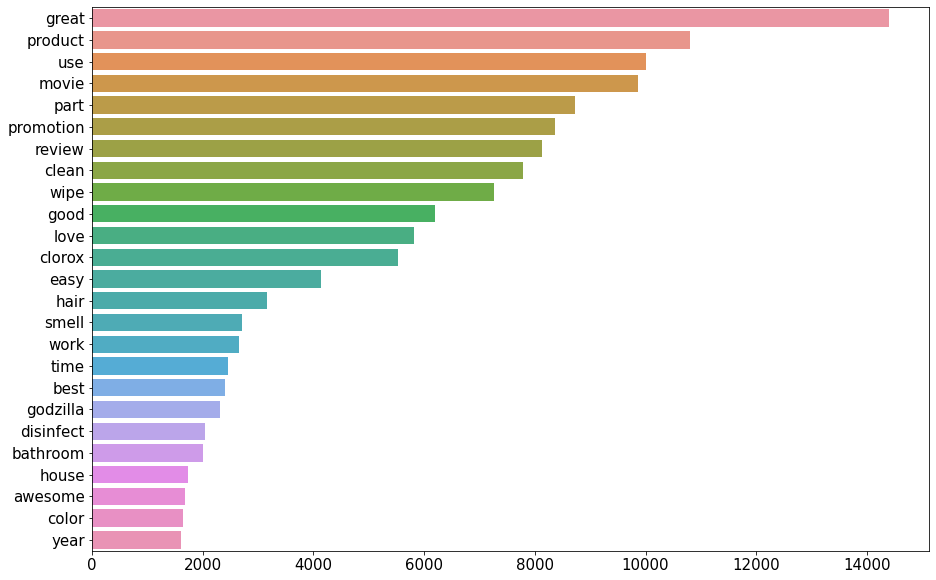

In [54]:
#Find the top 25 words by frequency among positive reviews and their frequency count
plt.figure(figsize=(15,10))
plot_word_frequency(pos_review.finalReviews,25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

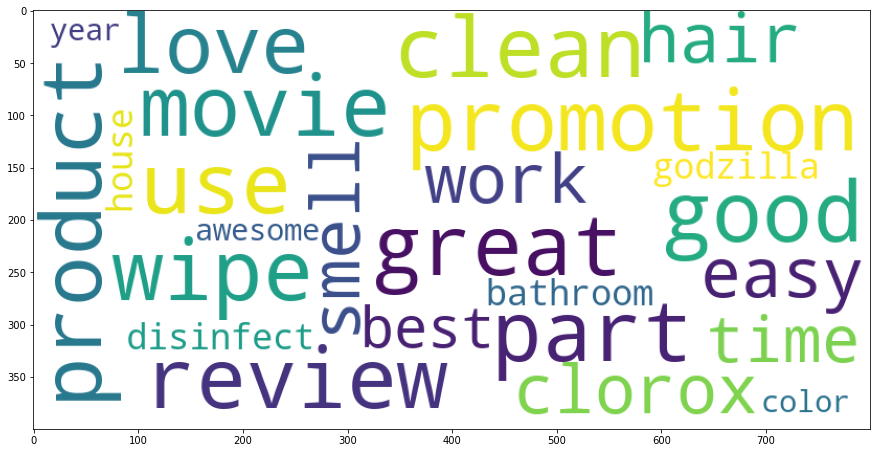

In [55]:
#print wordCloud for top 25 keywords for positive reviews
top_pos_25_words = FreqDist([w for seq in pos_review.finalReviews.str.split().values.tolist() for w in seq]).most_common(25)
creatWordCloud(top_pos_25_words)

[('product', 1934),
 ('hair', 1527),
 ('use', 1470),
 ('formula', 1398),
 ('new', 1261),
 ('old', 1078),
 ('good', 1066),
 ('movie', 1033),
 ('gel', 760),
 ('year', 641),
 ('great', 627),
 ('change', 581),
 ('review', 559),
 ('smell', 550),
 ('conditioner', 517),
 ('part', 464),
 ('please', 451),
 ('work', 450),
 ('scent', 442),
 ('time', 441),
 ('bad', 413),
 ('shampoo', 392),
 ('promotion', 372),
 ('original', 351),
 ('godzilla', 345)]


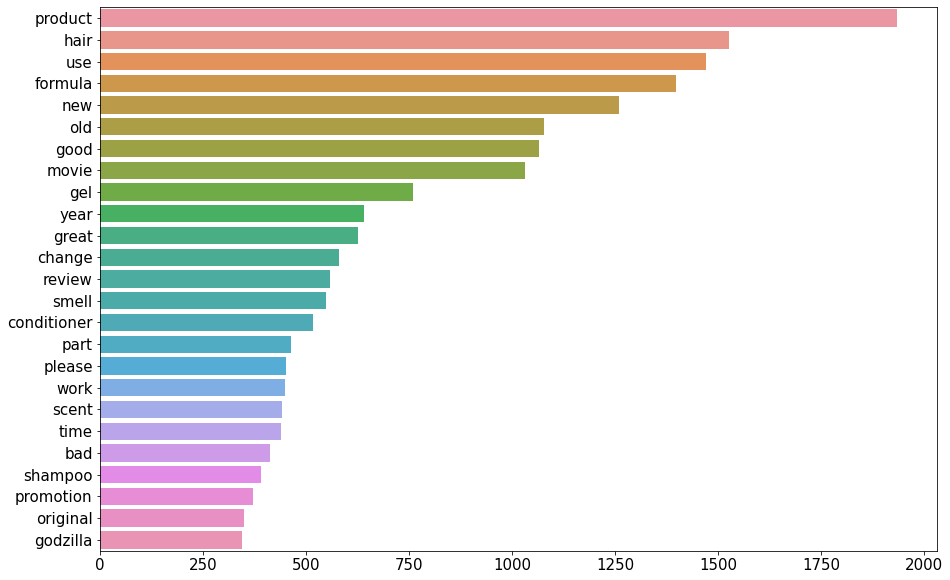

In [56]:
#Find the top 25 keywords by frequency among negative reviews and their frequency count
plt.figure(figsize=(15,10))
plot_word_frequency(neg_review.finalReviews,25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

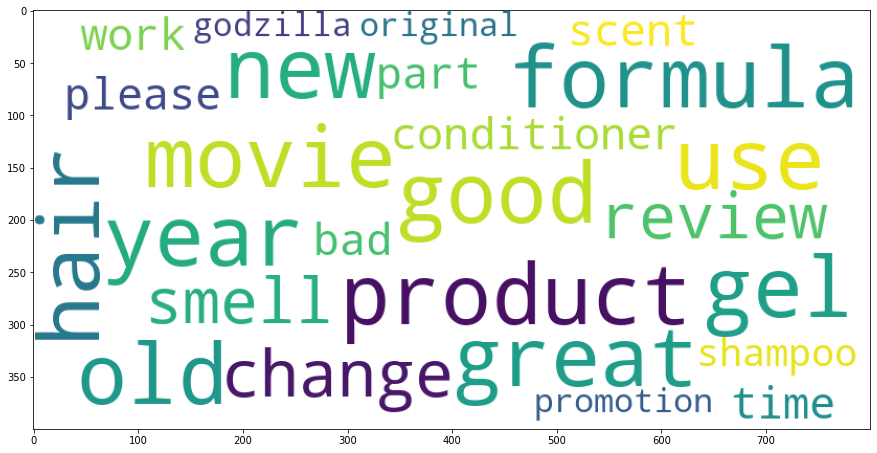

In [57]:
#print wordCloud for top 25 keywords for negative reviews
top_neg_25_words = FreqDist([w for seq in neg_review.finalReviews.str.split().values.tolist() for w in seq]).most_common(25)
creatWordCloud(top_neg_25_words)

### Find the top unigrams,bigrams and trigrams by frequency among all the reviews after processing the text.

In [58]:
#create a function for extracting top ngrams from the text
def get_top_ngrams(text, n=None, ngram=(1,1)):
  vec = CountVectorizer(stop_words='english', ngram_range=ngram).fit(text)
  bagofwords = vec.transform(text)
  sum_words = bagofwords.sum(axis=0)
  words_frequency = [(word, sum_words[0, index]) for word, index in vec.vocabulary_.items()]
  words_frequency = sorted(words_frequency, key = lambda x: x[1], reverse=True)
  return words_frequency[:n]

In [59]:
#function to create plot to see top 25 unigrams

def createBarPlot(df,xlabel,ylabel,title):
    plt.figure(figsize=[20,8])
    sns.barplot(x=df['ngram'], y=df['count'])
    plt.xticks(rotation=45,fontsize=12)
    plt.xlabel(xlabel,fontsize=15)
    plt.ylabel(ylabel,fontsize=15)
    plt.title(title,fontsize=15)
    return plt.show()

In [60]:
#Write your code here to find the top 25 unigram frequency among the reviews in the cleaned datafram(df_clean).
#top25_unigrams for positive sentiments
top_25PosUnigram = get_top_ngrams(pos_review.finalReviews.values.astype('U'),n=25,ngram = (1,1))
top_25PosUnigram = pd.DataFrame(top_25PosUnigram,columns=['ngram','count'])
top_25PosUnigram

,ngram,count
0,great,14397
1,product,10805
2,use,10002
3,movie,9856
4,promotion,8374
5,review,8135
6,clean,7780
7,wipe,7262
8,good,6203
9,love,5825


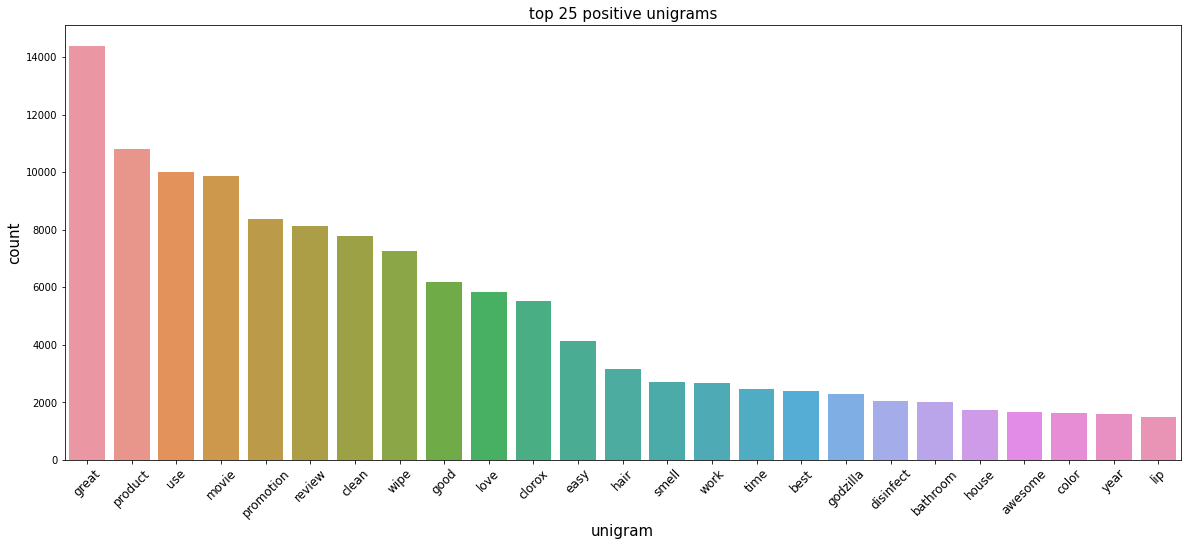

In [61]:
createBarPlot(top_25PosUnigram,'unigram','count','top 25 positive unigrams')

In [62]:
#top25_unigrams for negative sentiments
top_25NegUnigram = get_top_ngrams(neg_review.finalReviews.values.astype('U'),n=25,ngram = (1,1))
top_25NegUnigram = pd.DataFrame(top_25NegUnigram,columns=['ngram','count'])
top_25NegUnigram

,ngram,count
0,product,1934
1,hair,1527
2,use,1470
3,formula,1398
4,new,1261
5,old,1078
6,good,1066
7,movie,1033
8,gel,760
9,year,641


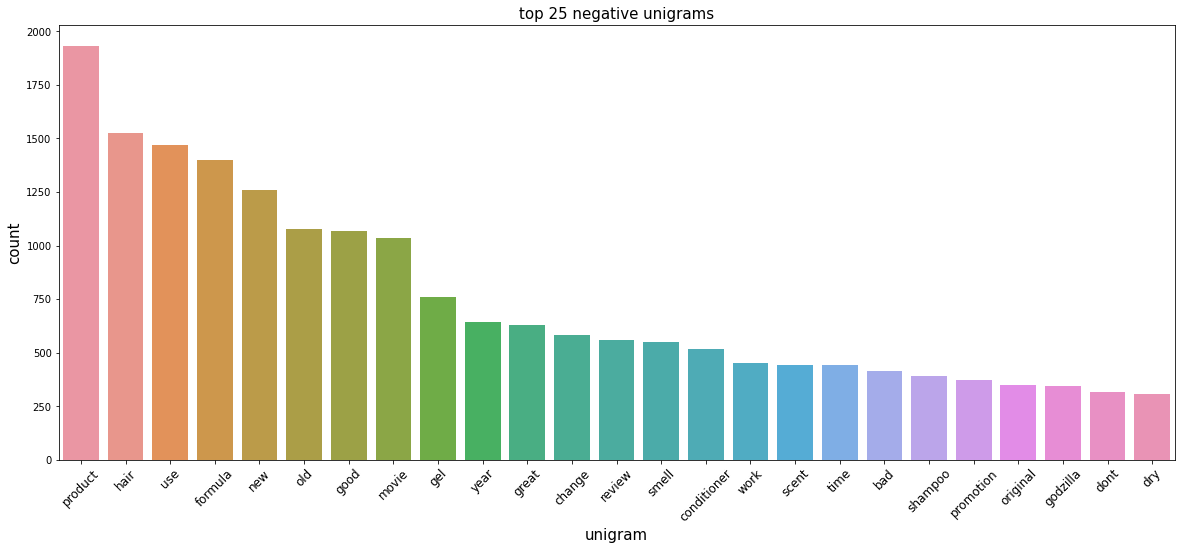

In [63]:
#plotting top 25 unigrams
createBarPlot(top_25NegUnigram,'unigram','count','top 25 negative unigrams')

In [64]:
#Write your code here to find the top 25 bigram frequency among the positive reviews 
top_25Posbigram = get_top_ngrams(pos_review.finalReviews.values.astype('U'),n=25,ngram = (2,2))
top_25Posbigram = pd.DataFrame(top_25Posbigram,columns=['ngram','count'])
top_25Posbigram

,ngram,count
0,review promotion,6723
1,clorox wipe,2489
2,great product,1983
3,great movie,1766
4,easy use,1534
5,collect promotion,1351
6,use clorox,965
7,good movie,945
8,review collect,908
9,movie great,889


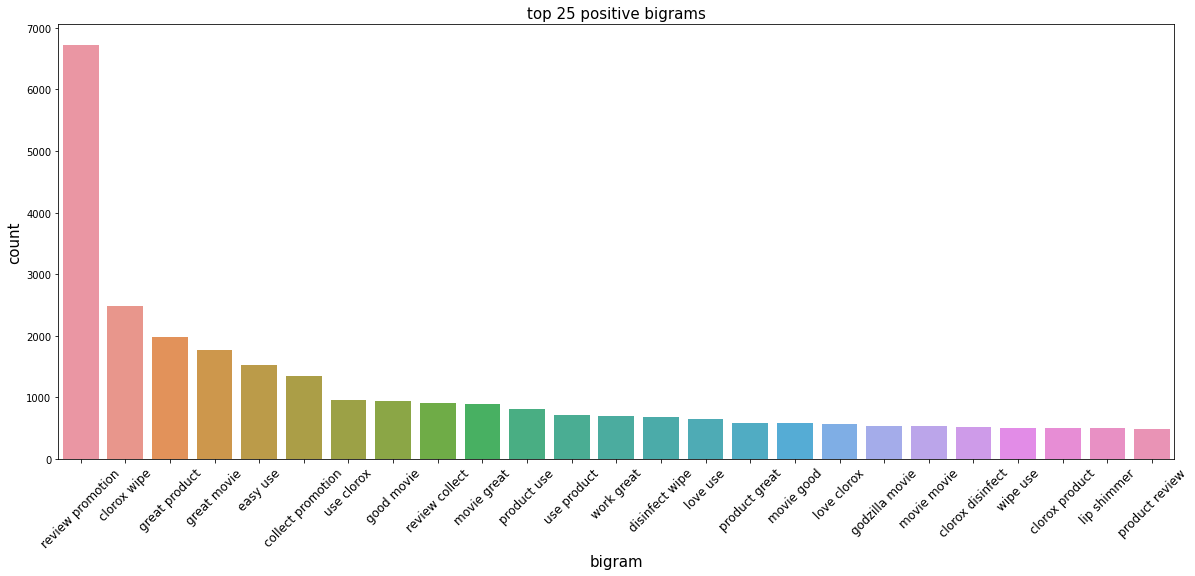

In [65]:
#plotting top 25 bigrams for positive sentiments
createBarPlot(top_25Posbigram,'bigram','count','top 25 positive bigrams')

In [66]:
#Write your code here to find the top 25 bigram frequency among the negative reviews 
top_25Negbigram = get_top_ngrams(neg_review.finalReviews.values.astype('U'),n=25,ngram = (2,2))
top_25Negbigram = pd.DataFrame(top_25Negbigram,columns=['ngram','count'])
top_25Negbigram

,ngram,count
0,old formula,516
1,new formula,506
2,review promotion,318
3,exxtra gel,175
4,use product,166
5,shampoo conditioner,141
6,gel year,131
7,product year,124
8,new product,121
9,receive product,117


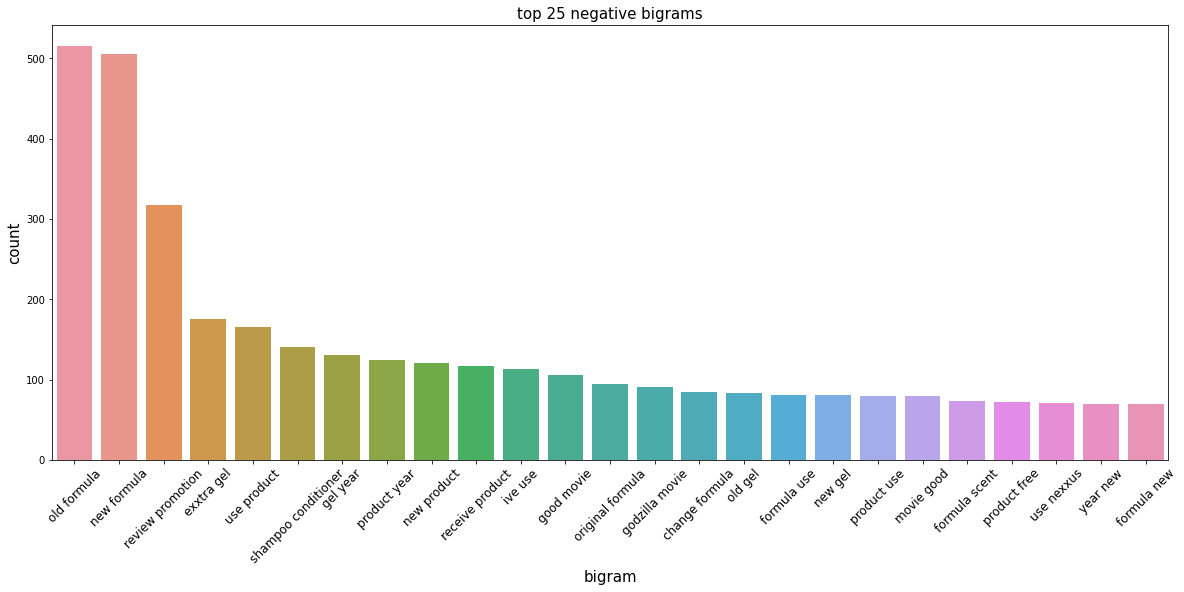

In [67]:
#plotting top 25 bigrams for negative sentiments
createBarPlot(top_25Negbigram,'bigram','count','top 25 negative bigrams')

In [68]:
#Write your code here to find the top 25 trigram frequency among the positive reviews 
top_25Postrigram = get_top_ngrams(pos_review.finalReviews.values.astype('U'),n=25,ngram = (3,3))
top_25Postrigram = pd.DataFrame(top_25Postrigram,columns=['ngram','count'])
top_25Postrigram

,ngram,count
0,review collect promotion,908
1,use clorox wipe,477
2,clean review promotion,456
3,clorox disinfect wipe,412
4,product review collect,355
5,use review promotion,301
6,great movie great,278
7,movie great movie,261
8,wipe easy use,242
9,great product use,240


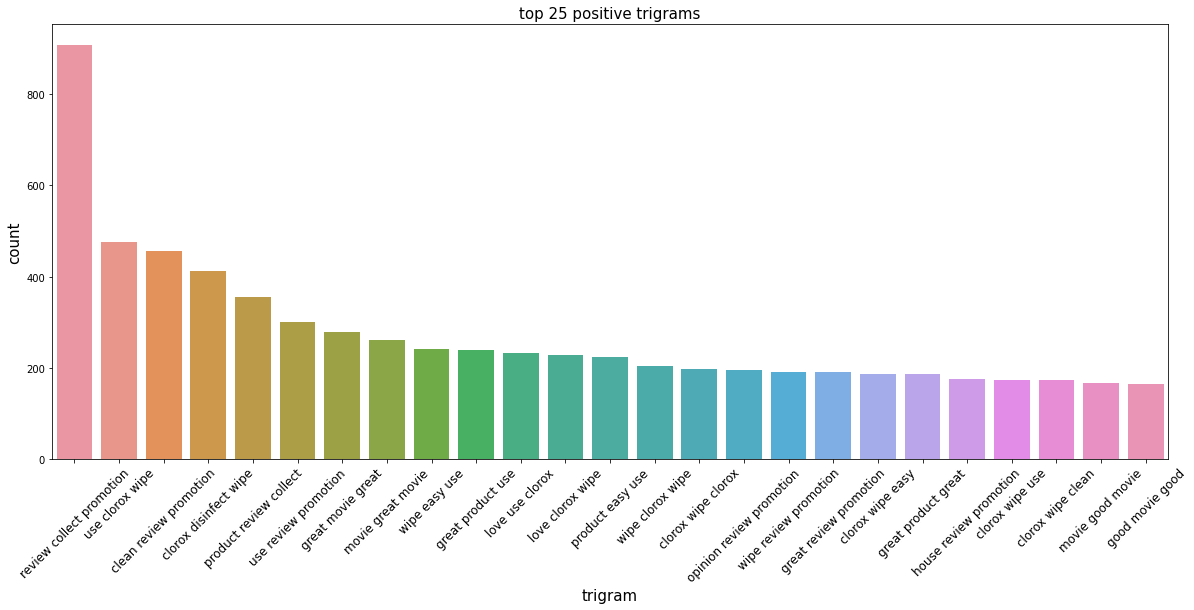

In [69]:
#plotting top 25 trigrams for positive sentiments
createBarPlot(top_25Postrigram,'trigram','count','top 25 positive trigrams')

In [70]:
#Write your code here to find the top 25 trigram frequency among the positive reviews 
top_25Negtrigram = get_top_ngrams(neg_review.finalReviews.values.astype('U'),n=25,ngram = (3,3))
top_25Negtrigram = pd.DataFrame(top_25Negtrigram,columns=['ngram','count'])
top_25Negtrigram

,ngram,count
0,use product year,79
1,opinion review promotion,63
2,nexxus exxtra gel,60
3,receive product free,54
4,use gel year,45
5,use old formula,43
6,exxtra gel year,42
7,year new formula,38
8,use nexxus exxtra,37
9,old formula use,36


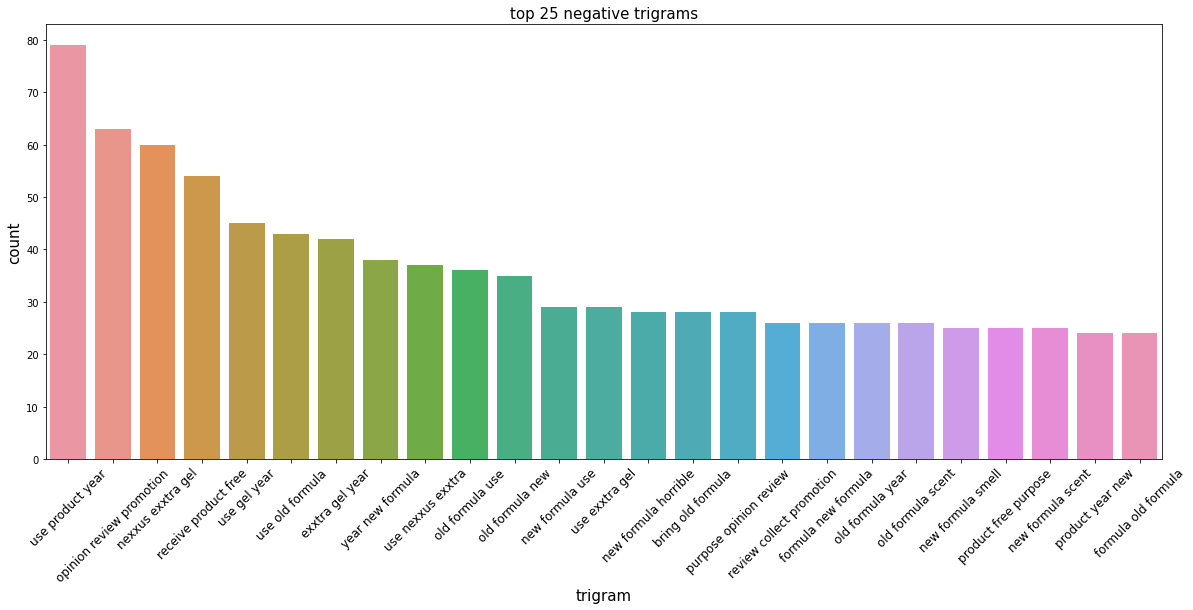

In [71]:
#plotting top 25 trigrams for positive sentiments
createBarPlot(top_25Negtrigram,'trigram','count','top 25 negative trigrams')

In [72]:
#let's check the distribution of the user sentiments for all reviews again
#distribution of user sentiments in percentage
for i in range(len(reviewsData.user_sentiment.value_counts().to_list())):
    print(reviewsData.user_sentiment.value_counts().index[i] + ' user sentiments across all reviews are {0}'.format(round(100*data.user_sentiment.value_counts()[i]/len(data.user_sentiment.index),2))+'%')

Positive user sentiments across all reviews are 89.52%
Negative user sentiments across all reviews are 10.47%


# 4. Feature Extraction

Convert the raw texts to a matrix of TF-IDF features

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

**min_df** is used for removing terms that appear too infrequently
min_df = 2 means "ignore terms that appear in less than 2 complaints"

In [73]:
reviewsData = reviewsData[['id','name','reviews_rating', 'reviews_username', 'reviewsText','finalReviews','user_sentiment']]
print(reviewsData.shape)

(29937, 7)


In [74]:
#convert categorical value to numerical for user_sentiment
reviewsData.user_sentiment = reviewsData.user_sentiment.map({'Positive':1,'Negative':0})

In [75]:
reviewsData.user_sentiment.value_counts()

1    26802
0     3135
Name: user_sentiment, dtype: int64

In [76]:
#Write your code here to initialise the TfidfVectorizer 
tfIdf = TfidfVectorizer(stop_words='english',max_df = 0.90,min_df=2,binary=True,ngram_range=(1,2)) # only unigram and bigrams are allowed

In [77]:
#Write your code here to create the Document Term Matrix by transforming the complaints column present in df_clean.
X_train_tfidf = tfIdf.fit_transform(reviewsData.finalReviews)
y = reviewsData.user_sentiment

In [78]:
X_train_tfidf.shape

(29937, 48774)

In [79]:
#print(tfIdf.get_feature_names)

In [80]:
# split the dataset into train and test
X_train,X_test,y_train,y_test = train_test_split(X_train_tfidf,y,test_size=0.3,random_state=42)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(20955, 48774) (8982, 48774)
(20955,) (8982,)


In [81]:
#we need to handle the class imbalance to handle the uneven distribution of user sentiments

print(Counter(y_train))

Counter({1: 18735, 0: 2220})


In [82]:
#we will use SMOTE to handle class imbalance
sm = SMOTE()
X_train,y_train = sm.fit_resample(X_train,y_train)
print(Counter(y_train))

Counter({1: 18735, 0: 18735})


In [83]:
print(X_train.shape)

(37470, 48774)


# 5. Model Building using superwised learning

We will create below superwised models and will select the best model with higher accuracy

1. Logistic regression
2. Random forest
3. XGBoost
4. Naive Bayes

In [84]:
#create a model class with all relevant method for model evaluation

class SuperWisedModelBuilder():
    
    #initialize the class object
    def __init__(self, model, X_train,X_test,y_train,y_test):
        self.model = model
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
    
    # train the model
    def train_model(self):
        self.model.fit(self.X_train,self.y_train)
        return self.model.predict(X_test)
    
    #evaluate the model
    def evaluate_model(self,y_pred_class):
        y_pred_prob = self.model.predict_proba(self.X_test)[:,1]
        self.printClassification_report(y_pred_class)
        print('######'*20)
        print('')
        self.metricsResult = self.evaluate_metrics(y_pred_class,y_pred_prob)
        print('')
        print('######'*20)
        print('')
        print("Confusion matrix")
        self.confusion_matrix(y_pred_class)
        print('######'*20)
        print('')
        print('ROC Curve')
        self.plot_roc_curve()
#         print('Precision- Recall Curve')
#         self.plot_precision_recall_vs_thresold(y_pred_prob)
#         print('######'*20)
        return self.metricsResult   

    def printClassification_report(self,y_pred_class):
        print("######"*20)
        print('')
        print('Classification report')
        print(metrics.classification_report(self.y_test, y_pred_class))
    
        
        
    def evaluate_metrics(self,y_pred_class,y_pred_prob):
        metricsResult = dict()
        modelAccuracy = metrics.accuracy_score(self.y_test,y_pred_class)
        modelPrecision = metrics.precision_score(self.y_test,y_pred_class)
        modelRecall = metrics.recall_score(self.y_test,y_pred_class)
        modelRoCAuCScore = metrics.roc_auc_score(self.y_test,y_pred_prob)
        modelf1Score = metrics.f1_score(self.y_test,y_pred_class)
        
        print("model accuracy is {0}%".format(round(100*modelAccuracy,2)))
        print("model precision is {0}%".format(round(100*modelPrecision,2)))
        print("model recall is {0}%".format(round(100*modelRecall,2)))
        print("model f1-score  is {0}%".format(round(100*modelf1Score,2)))
        print("model ROC-AUC score is {0}%".format(round(100*modelRoCAuCScore,2)))
    
        metricsResult['accuracy'] = modelAccuracy
        metricsResult['precision'] = modelPrecision
        metricsResult['recall'] = modelRecall
        metricsResult['f1-score'] = modelf1Score
        metricsResult['ROC-AUC score'] = modelRoCAuCScore
        
        return metricsResult
    
    def confusion_matrix(self, y_pred_class):
        confusion_matrix = metrics.confusion_matrix(self.y_test, y_pred_class)
        self.plot_confusion_matrix(confusion_matrix,self.model.classes_)
        
        
    def plot_confusion_matrix(self,data, classes_):
        sns.set(color_codes=True)
        plt.figure(figsize=(5,4))
        plt.title("Confusion Matrix")
        group_names = ['True Neg','False Pos','False Neg','True Pos']
        group_counts = ['{0:0.0f}'.format(value) for value in
                data.flatten()]
        group_percentages = ['{0:.2%}'.format(value) for value in
                     data.flatten()/np.sum(data)]
        labels = [f'{v1}\n{v2}\n{v3}' for v1, v2 ,v3 in zip(group_names,group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(2,2)
        ax = sns.heatmap(data/np.sum(data), annot=labels, fmt='', cmap='Blues')
        ax.set_xticklabels(classes_)
        ax.set_yticklabels(classes_)
        ax.set(ylabel="True Values", xlabel="Predicted Values")
        plt.show()
    
    def plot_roc_curve(self):
        metrics.plot_roc_curve(self.model,self.X_test,self.y_test)
        
    def plot_precision_recall_vs_thresold(self,y_pred_prob):
        pre, rec, thr = metrics.precision_recall_curve(self.y_test, y_pred_prob)
        plt.figure(figsize=(8,4))
        plt.plot(thr, pre[:-1], label='precision')
        plt.plot(thr, rec[1:], label='recall')
        plt.xlabel('Threshold')
        plt.title('Precision & Recall vs Threshold', c='r', size=16)
        plt.legend()
        plt.show() 
        

In [86]:
def save_object(obj, filename):
    filename = "/content/drive/Othercomputers/My Laptop/Capstone Project/Sentiment Based Product Recommendation System/pickleFIles/"+filename+'.pkl'
    pickle.dump(obj, open(filename, 'wb'))

In [87]:
#save tfIdf vector for future use
save_object(tfIdf,'tfIdf vector')

In [190]:
#save the clean dataframe 
reviewsData_clean = reviewsData.copy()
save_object(reviewsData_clean,'Clean Dataset')

# Logistic Regression

CPU times: user 631 ms, sys: 477 ms, total: 1.11 s
Wall time: 803 ms
########################################################################################################################

Classification report
              precision    recall  f1-score   support

           0       0.53      0.74      0.62       915
           1       0.97      0.93      0.95      8067

    accuracy                           0.91      8982
   macro avg       0.75      0.83      0.78      8982
weighted avg       0.92      0.91      0.91      8982

########################################################################################################################

model accuracy is 90.71%
model precision is 96.95%
model recall is 92.57%
model f1-score  is 94.71%
model ROC-AUC score is 91.88%

########################################################################################################################

Confusion matrix


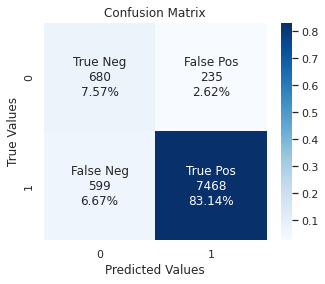

########################################################################################################################

ROC Curve


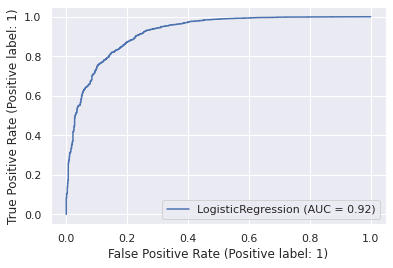

In [88]:
model = LogisticRegression(random_state=42,solver='liblinear', class_weight="balanced")
lr_model = SuperWisedModelBuilder(model,X_train,X_test,y_train,y_test)
%time y_pred_class = lr_model.train_model()
result_metrics = lr_model.evaluate_model(y_pred_class)

    f1 score is almot 94% with resample data.Let's try hyperparameter tuning

In [ ]:
# hyperparameter tuning
# grid = {"C": [100, 10, 5, 4, 3, 2, 1, 1.0, 0.1, 0.01],
#                 "solver": ["liblinear"],'penalty' : ['l2']}

# lr_hpm = GridSearchCV(LogisticRegression(random_state=42),
#                                 param_grid=grid,
#                                 cv=4,
#                                 verbose=True,
#                                 n_jobs=-1)

# # Fit random hyperparameter search model
# lr_hpm.fit(X_train, y_train)
# #find best estimators
# lr_hpm.best_estimator_

CPU times: user 1.74 s, sys: 1.38 s, total: 3.12 s
Wall time: 2.45 s
########################################################################################################################

Classification report
              precision    recall  f1-score   support

           0       0.58      0.64      0.61       915
           1       0.96      0.95      0.95      8067

    accuracy                           0.92      8982
   macro avg       0.77      0.79      0.78      8982
weighted avg       0.92      0.92      0.92      8982

########################################################################################################################

model accuracy is 91.53%
model precision is 95.83%
model recall is 94.68%
model f1-score  is 95.25%
model ROC-AUC score is 89.89%

########################################################################################################################

Confusion matrix


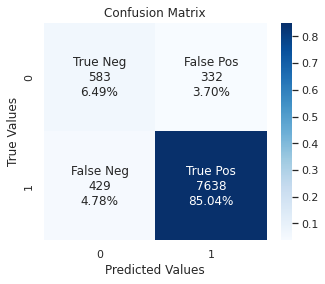

########################################################################################################################

ROC Curve


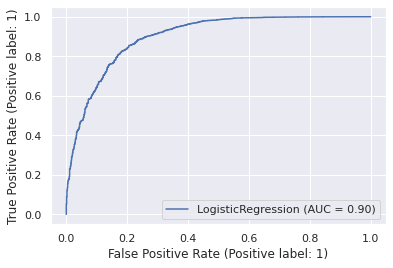

In [89]:
#let's train the model with this estimator and evalute the model
lr_model_hpt = LogisticRegression(C=100, random_state=42, solver='liblinear')
lr_modelBuilder = SuperWisedModelBuilder(lr_model_hpt,X_train,X_test,y_train,y_test)
%time y_pred_class = lr_modelBuilder.train_model()
lr_result_metrics  = lr_modelBuilder.evaluate_model(y_pred_class)

    we can see not much difference on f1-score after hyperparameter tuning also f1-score is on lower side for class 0 .Let's try other models

In [90]:
save_object(lr_model_hpt,'Logistic Regression')

# Decision Tree

CPU times: user 2.16 s, sys: 2.5 ms, total: 2.16 s
Wall time: 2.15 s
########################################################################################################################

Classification report
              precision    recall  f1-score   support

           0       0.25      0.81      0.38       915
           1       0.97      0.72      0.83      8067

    accuracy                           0.73      8982
   macro avg       0.61      0.76      0.60      8982
weighted avg       0.90      0.73      0.78      8982

########################################################################################################################

model accuracy is 72.79%
model precision is 97.07%
model recall is 71.87%
model f1-score  is 82.59%
model ROC-AUC score is 80.67%

########################################################################################################################

Confusion matrix


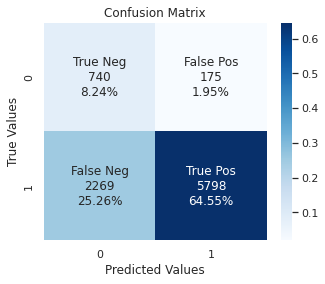

########################################################################################################################

ROC Curve


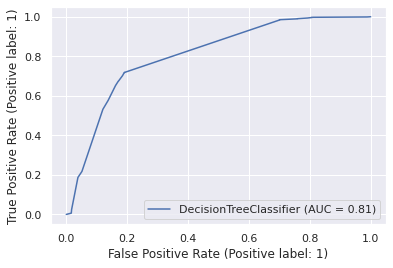

In [91]:
dt = DecisionTreeClassifier(random_state=42,criterion="gini", max_depth=10)
dt_model = SuperWisedModelBuilder(dt,X_train,X_test,y_train,y_test)
%time y_pred_class = dt_model.train_model()
dt_result_metrics = dt_model.evaluate_model(y_pred_class)

    f1 score is lower as compare to logistic regression.Let's do hyperparameter tuning

In [ ]:
#hyperparameter tuning
# param = { "max_depth": [3, 5, 10,15],
#            "min_samples_split": np.arange(3, 20, 3),
#            "min_samples_leaf": np.arange(1, 20, 4),
#         "criterion":['gini','entropy']}

# gs = GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid=param,n_jobs=-1,verbose=True,cv=4)
# %time gs.fit(X_train,y_train)
# print(gs.best_estimator_)

CPU times: user 3.31 s, sys: 7.13 ms, total: 3.32 s
Wall time: 3.32 s
########################################################################################################################

Classification report
              precision    recall  f1-score   support

           0       0.33      0.66      0.44       915
           1       0.96      0.85      0.90      8067

    accuracy                           0.83      8982
   macro avg       0.64      0.76      0.67      8982
weighted avg       0.89      0.83      0.85      8982

########################################################################################################################

model accuracy is 83.0%
model precision is 95.71%
model recall is 84.88%
model f1-score  is 89.97%
model ROC-AUC score is 81.95%

########################################################################################################################

Confusion matrix


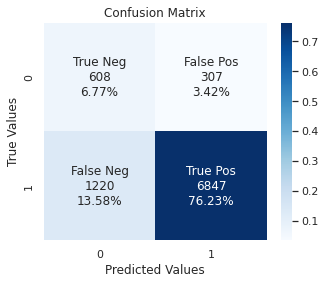

########################################################################################################################

ROC Curve


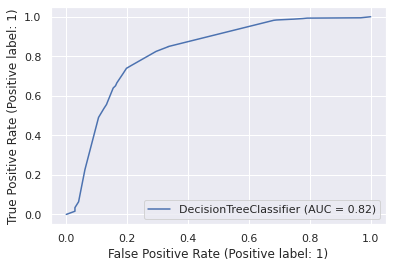

In [92]:
# CPU times: user 3 µs, sys: 0 ns, total: 3 µs
# Wall time: 7.15 µs
# Fitting 4 folds for each of 240 candidates, totalling 960 fits
# best estimator is DecisionTreeClassifier(max_depth=15, min_samples_split=3, random_state=42)
#train dt model with best parameters
dt_model_hpt = DecisionTreeClassifier(max_depth=15, min_samples_split=3, random_state=42)
dt_modelBuilder = SuperWisedModelBuilder(dt_model_hpt,X_train,X_test,y_train,y_test)
%time y_pred_class = dt_modelBuilder.train_model()
dt_result_metrics = dt_modelBuilder.evaluate_model(y_pred_class)

In [93]:
save_object(dt_model_hpt,'DecisionTree Model')

CPU times: user 2min 1s, sys: 261 ms, total: 2min 2s
Wall time: 1min 12s
########################################################################################################################

Classification report
              precision    recall  f1-score   support

           0       0.67      0.54      0.59       915
           1       0.95      0.97      0.96      8067

    accuracy                           0.93      8982
   macro avg       0.81      0.75      0.78      8982
weighted avg       0.92      0.93      0.92      8982

########################################################################################################################

model accuracy is 92.55%
model precision is 94.86%
model recall is 96.96%
model f1-score  is 95.9%
model ROC-AUC score is 90.46%

########################################################################################################################

Confusion matrix


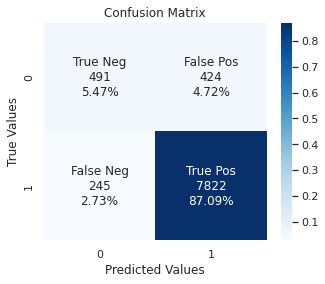

########################################################################################################################

ROC Curve


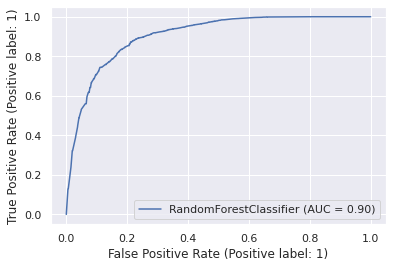

In [94]:
rf = RandomForestClassifier(criterion = 'gini',random_state=42,n_jobs=-1)
rf_model = SuperWisedModelBuilder(rf,X_train,X_test,y_train,y_test)
%time y_pred_class = rf_model.train_model()
rf_result_metrics = rf_model.evaluate_model(y_pred_class)

In [ ]:
#hyperparameter tuning
# params = {"n_estimators": np.arange(25, 125, 25),
#            "max_depth": [3, 5, 10],
#            "min_samples_split": np.arange(2, 20, 2),
#            "min_samples_leaf": np.arange(1, 20, 2),
#           "criterion":['gini','entropy']}

# rf_hpt = GridSearchCV(RandomForestClassifier(oob_score=True,random_state=42),param_grid=params,cv=4,n_jobs=-1,verbose=True) 
# %time rf_hpt.fit(X_train,y_train)
# #find best estimator
# print(rf_hpt.best_estimator_)

CPU times: user 4.4 s, sys: 48.8 ms, total: 4.45 s
Wall time: 4.44 s
########################################################################################################################

Classification report
              precision    recall  f1-score   support

           0       0.45      0.56      0.50       915
           1       0.95      0.92      0.93      8067

    accuracy                           0.88      8982
   macro avg       0.70      0.74      0.72      8982
weighted avg       0.90      0.88      0.89      8982

########################################################################################################################

model accuracy is 88.42%
model precision is 94.87%
model recall is 92.09%
model f1-score  is 93.46%
model ROC-AUC score is 87.26%

########################################################################################################################

Confusion matrix


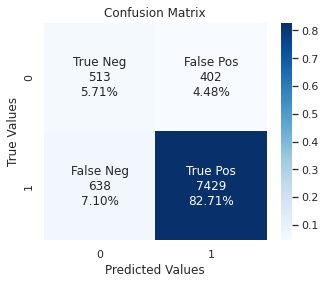

########################################################################################################################

ROC Curve


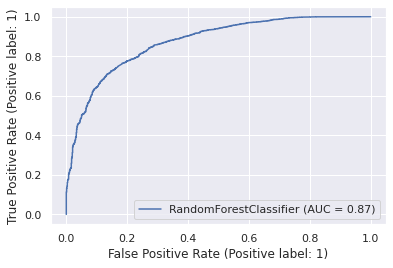

In [95]:
rf_model_hpt = RandomForestClassifier(max_depth=10, min_samples_split=8, oob_score=True,random_state=42)
rf_modelBuilder = SuperWisedModelBuilder(rf_model_hpt,X_train,X_test,y_train,y_test)
%time y_pred_class = rf_modelBuilder.train_model()
rf_result_metrics = rf_modelBuilder.evaluate_model(y_pred_class)

In [96]:
save_object(rf_model_hpt,"Random Forest Classifier")

f1 score is looking good but for negative class it is not above 50%

# XGBoost

[15:23:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 1min 8s, sys: 88.9 ms, total: 1min 8s
Wall time: 35 s
########################################################################################################################

Classification report
              precision    recall  f1-score   support

           0       0.58      0.56      0.57       915
           1       0.95      0.95      0.95      8067

    accuracy                           0.91      8982
   macro avg       0.77      0.76      0.76      8982
weighted avg       0.91      0.91      0.91      8982

########################################################################################################################

model accuracy is 91.38%
model precision is 95.04%
model recall is 95.39%
model f1-sc

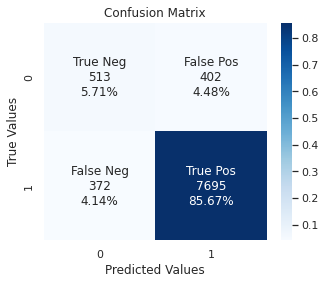

########################################################################################################################

ROC Curve


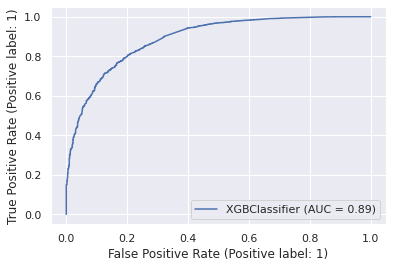

In [97]:
xgb_ = xgb.XGBClassifier(n_jobs=-1,random_state=42,learning_rate=0.1,objective = 'binary:logistic')
xgb_model = SuperWisedModelBuilder(xgb_,X_train,X_test,y_train,y_test)
%time y_pred_class = xgb_model.train_model()
xgb_metrics = xgb_model.evaluate_model(y_pred_class)

In [ ]:
#hyperparameter tuning
# params = {
#         'n_estimators' : [100, 200, 300], # no of trees 
#         'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],  # eta
#         'min_child_weight': [1, 5, 7, 10],
#         'gamma': [0.1, 0.5, 1, 1.5, 5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 5, 10]
#         }


# random_search = RandomizedSearchCV(xgb.XGBClassifier(random_state=42), param_distributions=params, n_iter=50,scoring='accuracy', n_jobs=-1, cv=4, verbose=3, random_state=42)
# %time random_search.fit(X_train,y_train)
# #find the best estimator
# print(random_search.best_estimator_)


Fitting 4 folds for each of 50 candidates, totalling 200 fits
[CV 1/4] END colsample_bytree=1.0, gamma=1.5, learning_rate=0.05, max_depth=3, min_child_weight=10, n_estimators=300, subsample=0.8;, score=0.830 total time=  51.4s
[CV 4/4] END colsample_bytree=1.0, gamma=1.5, learning_rate=0.05, max_depth=3, min_child_weight=10, n_estimators=300, subsample=0.8;, score=0.897 total time=  46.6s
[CV 2/4] END colsample_bytree=1.0, gamma=5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.8;, score=0.870 total time= 1.8min
[CV 3/4] END colsample_bytree=1.0, gamma=5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.8;, score=0.870 total time= 1.8min
[CV 1/4] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=10, n_estimators=200, subsample=1.0;, score=0.850 total time= 1.1min
[CV 3/4] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=10, n_estimators=200, subsample=1.0;, score=0.921 total time= 1.1min
[CV 1/4] END colsample_bytree=0.8, gamma=5, learning_rate=0.25, max_depth=10, min_child_weight=7, n_estimators=300, subsample=1.0;, score=0.878 total time= 2.0min
[CV 3/4] END colsample_bytree=0.8, gamma=5, learning_rate=0.25, max_depth=10, min_child_weight=7, n_estimators=300, subsample=1.0;, score=0.946 total time= 2.0min
[CV 1/4] END colsample_bytree=0.8, gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6;, score=0.864 total time= 1.2min
[CV 3/4] END colsample_bytree=0.8, gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6;, score=0.933 total time= 1.2min
[CV 1/4] END colsample_bytree=0.8, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.8;, score=0.849 total time=  50.9s
[CV 3/4] END colsample_bytree=0.8, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.8;, score=0.920 total time=  51.2s
[CV 1/4] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.25, max_depth=10, min_child_weight=10, n_estimators=100, subsample=0.8;, score=0.868 total time=  36.5s
[CV 3/4] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.25, max_depth=10, min_child_weight=10, n_estimators=100, subsample=0.8;, score=0.932 total time=  37.3s
[CV 1/4] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=200, subsample=1.0;, score=0.846 total time=  44.8s
[CV 3/4] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=200, subsample=1.0;, score=0.920 total time=  45.2s
[CV 1/4] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.821 total time=  17.5s
[CV 3/4] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.889 total time=  17.4s
[CV 1/4] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.820 total time=  21.2s
[CV 3/4] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.887 total time=  21.7s
[CV 1/4] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.25, max_depth=3, min_child_weight=10, n_estimators=300, subsample=0.8;, score=0.863 total time=  28.9s
[CV 3/4] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.25, max_depth=3, min_child_weight=10, n_estimators=300, subsample=0.8;, score=0.925 total time=  28.7s
[CV 1/4] END colsample_bytree=0.8, gamma=5, learning_rate=0.25, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6;, score=0.879 total time= 1.1min
[CV 3/4] END colsample_bytree=0.8, gamma=5, learning_rate=0.25, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6;, score=0.948 total time= 1.1min
[CV 1/4] END colsample_bytree=0.8, gamma=1.5, learning_rate=0.01, max_depth=10, min_child_weight=10, n_estimators=300, subsample=0.8;, score=0.819 total time= 2.0min
[CV 3/4] END colsample_bytree=0.8, gamma=1.5, learning_rate=0.01, max_depth=10, min_child_weight=10, n_estimators=300, subsample=0.8;, score=0.890 total time= 2.0min
[CV 1/4] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=10, n_estimators=300, subsample=0.8;, score=0.820 total time= 1.3min
[CV 3/4] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=10, n_estimators=300, subsample=0.8;, score=0.892 total time= 1.3min
[CV 1/4] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=200, subsample=0.6;, score=0.864 total time= 1.9min
[CV 3/4] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=200, subsample=0.6;, score=0.935 total time= 1.9min
[CV 1/4] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.02, max_depth=10, min_child_weight=7, n_estimators=300, subsample=0.6;, score=0.838 total time= 1.8min
[CV 3/4] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.02, max_depth=10, min_child_weight=7, n_estimators=300, subsample=0.6;, score=0.913 total time= 1.8min
[CV 1/4] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.25, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6;, score=0.877 total time=  46.4s
[CV 3/4] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.25, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6;, score=0.945 total time=  45.3s
[CV 1/4] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6;, score=0.820 total time=  31.4s
[CV 3/4] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6;, score=0.889 total time=  31.2s
[CV 1/4] END colsample_bytree=1.0, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.813 total time=  28.3s
[CV 3/4] END colsample_bytree=1.0, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.884 total time=  27.9s
[CV 1/4] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.788 total time=  22.4s
[CV 3/4] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.854 total time=  23.1s
[CV 1/4] END colsample_bytree=0.6, gamma=1.5, learning_rate=0.01, max_depth=5, min_child_weight=10, n_estimators=100, subsample=1.0;, score=0.779 total time=  20.0s
[CV 3/4] END colsample_bytree=0.6, gamma=1.5, learning_rate=0.01, max_depth=5, min_child_weight=10, n_estimators=100, subsample=1.0;, score=0.820 total time=  19.7s
[CV 1/4] END colsample_bytree=1.0, gamma=1.5, learning_rate=0.25, max_depth=3, min_child_weight=7, n_estimators=300, subsample=0.6;, score=0.864 total time=  40.7s
[CV 3/4] END colsample_bytree=1.0, gamma=1.5, learning_rate=0.25, max_depth=3, min_child_weight=7, n_estimators=300, subsample=0.6;, score=0.929 total time=  41.7s
[CV 1/4] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.820 total time=  22.8s
[CV 3/4] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.887 total time=  22.8s
[CV 1/4] END colsample_bytree=0.6, gamma=5, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=300, subsample=0.6;, score=0.829 total time=  30.5s
[CV 3/4] END colsample_bytree=0.6, gamma=5, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=300, subsample=0.6;, score=0.901 total time=  29.8s
[CV 1/4] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.02, max_depth=10, min_child_weight=10, n_estimators=200, subsample=0.8;, score=0.827 total time= 1.6min
[CV 3/4] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.02, max_depth=10, min_child_weight=10, n_estimators=200, subsample=0.8;, score=0.901 total time= 1.6min[CV 2/4] END colsample_bytree=1.0, gamma=1.5, learning_rate=0.05, max_depth=3, min_child_weight=10, n_estimators=300, subsample=0.8;, score=0.900 total time=  50.7s
[CV 3/4] END colsample_bytree=1.0, gamma=1.5, learning_rate=0.05, max_depth=3, min_child_weight=10, n_estimators=300, subsample=0.8;, score=0.900 total time=  46.6s
[CV 1/4] END colsample_bytree=1.0, gamma=5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.8;, score=0.799 total time= 1.9min
[CV 4/4] END colsample_bytree=1.0, gamma=5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.8;, score=0.871 total time= 1.8min
[CV 2/4] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=10, n_estimators=200, subsample=1.0;, score=0.923 total time= 1.1min
[CV 4/4] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=10, n_estimators=200, subsample=1.0;, score=0.922 total time= 1.1min
[CV 2/4] END colsample_bytree=0.8, gamma=5, learning_rate=0.25, max_depth=10, min_child_weight=7, n_estimators=300, subsample=1.0;, score=0.945 total time= 2.1min
[CV 4/4] END colsample_bytree=0.8, gamma=5, learning_rate=0.25, max_depth=10, min_child_weight=7, n_estimators=300, subsample=1.0;, score=0.946 total time= 2.1min
[CV 2/4] END colsample_bytree=0.8, gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6;, score=0.935 total time= 1.2min
[CV 4/4] END colsample_bytree=0.8, gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6;, score=0.936 total time= 1.2min
[CV 2/4] END colsample_bytree=0.8, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.8;, score=0.921 total time=  51.0s
[CV 4/4] END colsample_bytree=0.8, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.8;, score=0.916 total time=  51.6s
[CV 2/4] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.25, max_depth=10, min_child_weight=10, n_estimators=100, subsample=0.8;, score=0.933 total time=  37.4s
[CV 4/4] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.25, max_depth=10, min_child_weight=10, n_estimators=100, subsample=0.8;, score=0.937 total time=  37.0s
[CV 2/4] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=200, subsample=1.0;, score=0.920 total time=  45.2s
[CV 4/4] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=200, subsample=1.0;, score=0.920 total time=  45.8s
[CV 2/4] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.892 total time=  16.9s
[CV 4/4] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.887 total time=  18.0s
[CV 2/4] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.891 total time=  21.6s
[CV 4/4] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.889 total time=  20.9s
[CV 2/4] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.25, max_depth=3, min_child_weight=10, n_estimators=300, subsample=0.8;, score=0.927 total time=  28.5s
[CV 4/4] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.25, max_depth=3, min_child_weight=10, n_estimators=300, subsample=0.8;, score=0.932 total time=  29.0s
[CV 2/4] END colsample_bytree=0.8, gamma=5, learning_rate=0.25, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6;, score=0.949 total time= 1.1min
[CV 4/4] END colsample_bytree=0.8, gamma=5, learning_rate=0.25, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6;, score=0.947 total time= 1.1min
[CV 2/4] END colsample_bytree=0.8, gamma=1.5, learning_rate=0.01, max_depth=10, min_child_weight=10, n_estimators=300, subsample=0.8;, score=0.892 total time= 2.0min
[CV 4/4] END colsample_bytree=0.8, gamma=1.5, learning_rate=0.01, max_depth=10, min_child_weight=10, n_estimators=300, subsample=0.8;, score=0.891 total time= 2.0min
[CV 2/4] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=10, n_estimators=300, subsample=0.8;, score=0.892 total time= 1.3min
[CV 4/4] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=10, n_estimators=300, subsample=0.8;, score=0.892 total time= 1.3min
[CV 2/4] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=200, subsample=0.6;, score=0.936 total time= 1.9min
[CV 4/4] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=200, subsample=0.6;, score=0.938 total time= 1.9min
[CV 2/4] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.02, max_depth=10, min_child_weight=7, n_estimators=300, subsample=0.6;, score=0.913 total time= 1.9min
[CV 4/4] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.02, max_depth=10, min_child_weight=7, n_estimators=300, subsample=0.6;, score=0.914 total time= 1.8min
[CV 2/4] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.25, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6;, score=0.946 total time=  45.2s
[CV 4/4] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.25, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6;, score=0.946 total time=  46.3s
[CV 2/4] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6;, score=0.892 total time=  30.9s
[CV 4/4] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6;, score=0.888 total time=  30.8s
[CV 2/4] END colsample_bytree=1.0, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.888 total time=  27.4s
[CV 4/4] END colsample_bytree=1.0, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.882 total time=  28.0s
[CV 2/4] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.858 total time=  23.2s
[CV 4/4] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.861 total time=  22.3s
[CV 2/4] END colsample_bytree=0.6, gamma=1.5, learning_rate=0.01, max_depth=5, min_child_weight=10, n_estimators=100, subsample=1.0;, score=0.850 total time=  19.7s
[CV 4/4] END colsample_bytree=0.6, gamma=1.5, learning_rate=0.01, max_depth=5, min_child_weight=10, n_estimators=100, subsample=1.0;, score=0.850 total time=  19.1s
[CV 2/4] END colsample_bytree=1.0, gamma=1.5, learning_rate=0.25, max_depth=3, min_child_weight=7, n_estimators=300, subsample=0.6;, score=0.931 total time=  41.5s
[CV 4/4] END colsample_bytree=1.0, gamma=1.5, learning_rate=0.25, max_depth=3, min_child_weight=7, n_estimators=300, subsample=0.6;, score=0.930 total time=  40.9s
[CV 2/4] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.890 total time=  23.1s
[CV 4/4] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.889 total time=  22.2s
[CV 2/4] END colsample_bytree=0.6, gamma=5, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=300, subsample=0.6;, score=0.900 total time=  30.5s
[CV 4/4] END colsample_bytree=0.6, gamma=5, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=300, subsample=0.6;, score=0.899 total time=  30.1s
[CV 2/4] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.02, max_depth=10, min_child_weight=10, n_estimators=200, subsample=0.8;, score=0.902 total time= 1.6min
[CV 4/4] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.02, max_depth=10, min_child_weight=10, n_estimators=200, subsample=0.8;, score=0.900 total time= 1.6minCPU times: user 1min 5s, sys: 261 ms, total: 1min 5s
Wall time: 1h 27min 48s
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

[15:24:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 2min 35s, sys: 214 ms, total: 2min 35s
Wall time: 1min 20s
########################################################################################################################

Classification report
              precision    recall  f1-score   support

           0       0.64      0.61      0.62       915
           1       0.96      0.96      0.96      8067

    accuracy                           0.92      8982
   macro avg       0.80      0.78      0.79      8982
weighted avg       0.92      0.92      0.92      8982

########################################################################################################################

model accuracy is 92.46%
model precision is 95.55%
model recall is 96.08%
model 

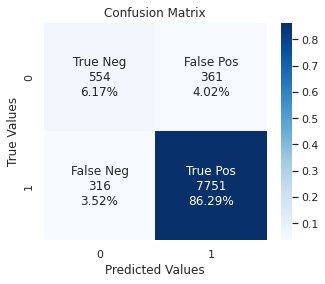

########################################################################################################################

ROC Curve


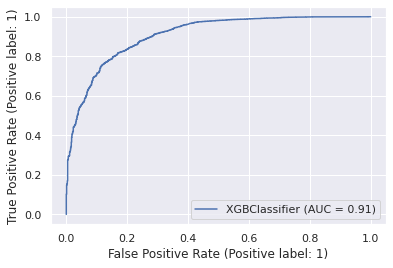

In [98]:
xgb_model_hpt = xgb.XGBClassifier(n_estimators=300,random_state=42, gamma=0.1,learning_rate=0.25,max_depth=5)
xgb_modelBuilder = SuperWisedModelBuilder(xgb_model_hpt,X_train,X_test,y_train,y_test)
%time y_pred_class = xgb_modelBuilder.train_model()
xgb_result_metrics = xgb_modelBuilder.evaluate_model(y_pred_class)

In [99]:
save_object(xgb_model_hpt,'XGBooster')

# Naive Byes Model

########################################################################################################################

Classification report
              precision    recall  f1-score   support

           0       0.44      0.77      0.56       915
           1       0.97      0.89      0.93      8067

    accuracy                           0.88      8982
   macro avg       0.71      0.83      0.74      8982
weighted avg       0.92      0.88      0.89      8982

########################################################################################################################

model accuracy is 87.69%
model precision is 97.14%
model recall is 88.91%
model f1-score  is 92.84%
model ROC-AUC score is 91.82%

########################################################################################################################

Confusion matrix


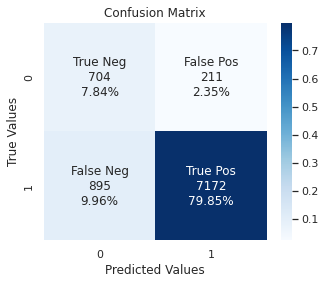

########################################################################################################################

ROC Curve


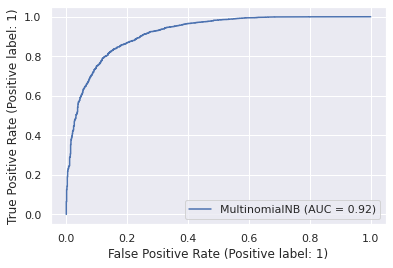

In [100]:
nb = MultinomialNB()
nb_model = SuperWisedModelBuilder(nb,X_train,X_test,y_train,y_test)
y_pred_class= nb_model.train_model()
nb_result_metrics = nb_model.evaluate_model(y_pred_class)

In [101]:
save_object(nb,'Naive Byes')

In [102]:
#creare a metrics dataframe 
metricsDic = {'metricsname':['accuracy','precision','recall','f1-score','ROC-AUC score']}
models = ['Logistic Regression','Decision Tree','Random Forest','XGBoost','Naive Byes']
modelMetrics = ['lr_resul_metrics','dt_result_metrics','rf_result_metrics','xgb_result_metrics','nb_result_metrics']
metricResult = pd.DataFrame(metricsDic)
metricResult['Logistic Regression'] = metricResult.metricsname.map(lr_result_metrics).apply(lambda x : str(round(x * 100,2))+'%')
metricResult['Decision Tree'] = metricResult.metricsname.map(dt_result_metrics).apply(lambda x : str(round(x * 100,2))+'%')
metricResult['Random Forest'] = metricResult.metricsname.map(rf_result_metrics).apply(lambda x : str(round(x * 100,2))+'%')
metricResult['XGBoost'] = metricResult.metricsname.map(xgb_result_metrics).apply(lambda x : str(round(x * 100,2))+'%')
metricResult['Naive Byes'] = metricResult.metricsname.map(nb_result_metrics).apply(lambda x : str(round(x * 100,2))+'%')
metricResult

,metricsname,Logistic Regression,Decision Tree,Random Forest,XGBoost,Naive Byes
0,accuracy,91.53%,83.0%,88.42%,92.46%,87.69%
1,precision,95.83%,95.71%,94.87%,95.55%,97.14%
2,recall,94.68%,84.88%,92.09%,96.08%,88.91%
3,f1-score,95.25%,89.97%,93.46%,95.82%,92.84%
4,ROC-AUC score,89.89%,81.95%,87.26%,90.73%,91.82%


#### from above table it is clear that XGBoost has the highest f1 score and accuracy. We will use XGBoost model for our system

# 6. Recommendation System
#### there are various method for building a recommendation system.

1. User based recommendation system
2. item based recommendation system

we will create both and find out the which one is best for our problem

In [104]:
reviewsData.shape

(29937, 7)

In [105]:
#create a new dataframe for recommendation system
recommData = reviewsData[['id','reviews_rating','reviews_username']]
recommData.shape

(29937, 3)

In [106]:
#check for null values in the dataframe
checkNaNvalues(recommData)

id                  0.0
reviews_rating      0.0
reviews_username    0.0
dtype: float64

In [107]:
dframe_alignment(reviewsData.sample(n=10))

,id,name,reviews_rating,reviews_username,reviewsText,finalReviews,user_sentiment
8482,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,5,kishacouponing101,Wonderful. I love this product. I give it 5 stars. Thanks so much. One of those things that helps make life better. This review was collected as part of a promotion.,wonderful product give star thing help life collect part promotion,1
25050,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,5,blurays,awesome. Now this is the godzilla I've been waiting for. If you're not an old school fanatic then this is not for you.,awesome godzilla ive waiting youre old school fanatic,1
9872,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,5,leesahp,Excellent!. Clorox has been a 1 cleaning product throughout my whole life. It gets the house nice and clean. Thank you Clorox! This review was collected as part of a promotion.,excellent clorox clean product whole life get house nice clean thank clorox review part promotion,1
18342,AVpfFymYilAPnD_xUvMh,"Kikkoman Soy Sauce, 5fl oz",5,nanajan,A long time user. Always look for this brand.,long time user brand,1
9623,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,5,lacey214,"Awesome. I absolutely love the Clorox wipes. I literally use them every day for my kitchen as well as doorknobs, etc. to kill germs!",awesome clorox wipe use day doorknobs etc kill germ,1
25775,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,5,json,Loved it. Close to the original.............................,close original,1
14383,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,5,alyce,Great Brand!. I love Clorox! My parents and grandparents used it and I have followed their tradition! This review was collected as part of a promotion.,great brand love clorox parent grandparent use follow tradition review part promotion,1
1903,AVpe41TqilAPnD_xQH3d,Mike Dave Need Wedding Dates (dvd + Digital),3,cindy,"A little funny.. This movie wasn't what I expected. It was a little funny but not hilarious like I thought it would be. The trailer revealed all the funny parts so when the movie was on, it wasn't that funny anymore. Too bad those were the only funny parts.",little funny movie wasnt little funny hilarious thought funny part movie wasnt bad funny part,0
2746,AVpe59io1cnluZ0-ZgDU,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),4,brockt,A lot of fun. It was great to see these characters again! Just as funny as the original movie.,lot fun great character funny original movie,1
20488,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,5,deej66,great. I love it it cleans fast,great love clean fast,1


In [108]:
#divide the data in to train and test
train,test = train_test_split(recommData,test_size=0.3,random_state=42)
print(train.shape)
print(test.shape)

(20955, 3)
(8982, 3)


In [109]:
# Pivot the train ratings' dataset into matrix format in which columns are id's and the rows are username.
recommData_pv = train.pivot_table(index ='reviews_username',columns='id',values='reviews_rating').fillna(0)
recommData_pv.head(10)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,...,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
08dallas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09mommy11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.11E+24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Creating dummy train & dummy test dataset.These dataset will be used for prediction

**Dummy train will be used later for prediction of the products which has not been rated by the user. To ignore the products rated by the user, we will rate it as 0 during prediction. The products not rated by user is rated as 1 for prediction in dummy train dataset.**

**Dummy test will be used for evaluation. To evaluate, we will only make prediction on the products rated by the user. So, this is marked as 1. This is just opposite of dummy_train.**

In [110]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()
dummy_train.shape

(20955, 3)

In [111]:
dummy_train.loc[dummy_train.id =='AVpfm8yiLJeJML43AYyu']

,id,reviews_rating,reviews_username
21385,AVpfm8yiLJeJML43AYyu,1,saraho
21791,AVpfm8yiLJeJML43AYyu,5,sporkette
21808,AVpfm8yiLJeJML43AYyu,5,ginnyd
21239,AVpfm8yiLJeJML43AYyu,1,ruky
21521,AVpfm8yiLJeJML43AYyu,1,shannon d
...,...,...,...
21565,AVpfm8yiLJeJML43AYyu,1,julie007
21290,AVpfm8yiLJeJML43AYyu,1,maretta
21318,AVpfm8yiLJeJML43AYyu,1,joe d
21824,AVpfm8yiLJeJML43AYyu,5,ginnyd


In [112]:
# The products not rated by user is marked as 1 for prediction. 
dummy_train.reviews_rating = dummy_train.reviews_rating.swifter.apply(lambda x : 0 if x >= 1 else 1 )

Pandas Apply:   0%|          | 0/20955 [00:00<?, ?it/s]

In [113]:
dummy_train.loc[dummy_train.id =='AVpfm8yiLJeJML43AYyu']

,id,reviews_rating,reviews_username
21385,AVpfm8yiLJeJML43AYyu,0,saraho
21791,AVpfm8yiLJeJML43AYyu,0,sporkette
21808,AVpfm8yiLJeJML43AYyu,0,ginnyd
21239,AVpfm8yiLJeJML43AYyu,0,ruky
21521,AVpfm8yiLJeJML43AYyu,0,shannon d
...,...,...,...
21565,AVpfm8yiLJeJML43AYyu,0,julie007
21290,AVpfm8yiLJeJML43AYyu,0,maretta
21318,AVpfm8yiLJeJML43AYyu,0,joe d
21824,AVpfm8yiLJeJML43AYyu,0,ginnyd


In [114]:
# Convert the dummy train dataset into matrix format in which columns are id's and the rows are username.
dummy_train_pv = dummy_train.reset_index().pivot_table(index='reviews_username',columns='id',values='reviews_rating').fillna(1)
dummy_train_pv.head(5)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,...,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0325home,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [115]:
dummy_train_pv.shape

(18275, 256)

## User User based similarity

**Cosine Similarity**

Cosine Similarity is a measurement that quantifies the similarity between two vectors [Which is Rating Vector in this case] 

**Adjusted Cosine**

Adjusted cosine similarity is a modified version of vector-based similarity where we incorporate the fact that different users have different ratings schemes. In other words, some users might rate items highly in general, and others might give items lower ratings as a preference. To handle this nature from rating given by user , we subtract average ratings for each user from each user's rating for different movies.

In [116]:
recommData_pv.index.nunique()

18275

In [117]:
# Creating the User Similarity Matrix using cosine_similarity function.
user_correlation_cs = cosine_similarity(recommData_pv)
user_correlation_cs[np.isnan(user_correlation_cs)] = 0
print(user_correlation_cs.shape)
print()
print(user_correlation_cs)

(18275, 18275)

[[1.        0.        0.        ... 0.        0.9486833 0.       ]
 [0.        1.        1.        ... 0.        0.        0.       ]
 [0.        1.        1.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 1.        0.        1.       ]
 [0.9486833 0.        0.        ... 0.        1.        0.       ]
 [0.        0.        0.        ... 1.        0.        1.       ]]


In [118]:
# using Adjusted Cosine similarity
# Here, we are not removing the NaN values and calculating the mean only for the products rated by the user
# Create a user-movie matrix.
recommData_adpv = train.reset_index().pivot_table(index='reviews_username', columns='id',values='reviews_rating')

In [119]:
print(recommData_adpv.shape)
print()
recommData_adpv.head(10)

(18275, 256)



id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,...,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0325home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06stidriver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
08dallas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09mommy11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.11E+24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
recommData_adpv.index.nunique()

18275

In [121]:
# Normalising the rating of the product for each user around 0 mean
mean = np.nanmean(recommData_adpv, axis=1)
recommData_adpv_subtracted = (recommData_adpv.T-mean).T

In [122]:
recommData_adpv_subtracted.head(10)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,...,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0325home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06stidriver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
08dallas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09mommy11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.11E+24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
# Creating the User Similarity Matrix using cosine_similarity function.
user_correlation_adcs = cosine_similarity(recommData_adpv_subtracted.fillna(0))
user_correlation_adcs[np.isnan(user_correlation_adcs)] = 0
print(user_correlation_adcs.shape)
print()
print(user_correlation_adcs)

(18275, 18275)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


 ### Prediction - User User

*Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0.*

In [124]:
user_correlation_adcs[user_correlation_adcs<0]=0
user_correlation_adcs

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [125]:
#Rating predicted by the user (for protucts rated as well as not rated) is the weighted sum of correlation with the product rating (as present in the rating dataset).
print(user_correlation_adcs.shape)
print(recommData_adpv.shape)

(18275, 18275)
(18275, 256)


In [126]:
user_predicted_ratings = np.dot(user_correlation_adcs, recommData_adpv.fillna(0))
user_predicted_ratings

array([[0.        , 0.        , 2.5       , ..., 1.46525748, 1.88982237,
        0.20412415],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [127]:
print(user_predicted_ratings.shape)

(18275, 256)


In [128]:
#Since we are interested only in the products not rated by the user, we will ignore the products rated by the user by making it zero. 
user_final_rating = np.multiply(user_predicted_ratings,dummy_train_pv)
user_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,...,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,2.5,3.596262,0.0,0.0,0.0,0.0,2.581989,1.018079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.154701,0.0,0.0,...,0.0,2.588202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.623441,0.0,2.5,0.0,0.0,0.645497,1.666667,0.188982,0.0,0.0,0.0,0.0,0.0,1.465257,1.889822,0.204124
01impala,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
02dakota,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
02deuce,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
0325home,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [129]:
print(user_final_rating.shape)

(18275, 256)


In [130]:
save_object(user_final_rating , 'user_user_based_recommendations')

#### Find top 10 recommendation for user


In [131]:
userId = '00sab00'
recommendations  = user_final_rating.loc[userId].sort_values(ascending=False)[0:10]
recommendations

id
AVpfPaoqLJeJML435Xk9    37.472929
AVpfRTh1ilAPnD_xYic2    29.191053
AVpf0eb2LJeJML43EVSt    14.259486
AVpf3VOfilAPnD_xjpun    12.313738
AVpf2tw1ilAPnD_xjflC    11.178377
AVpfBrUZilAPnD_xTUly     7.831663
AVpfov9TLJeJML43A7B0     6.623441
AVpf385g1cnluZ0-s0_t     6.253560
AVpfM_ytilAPnD_xXIJb     6.154565
AVpfR5m0LJeJML436K3W     5.650706
Name: 00sab00, dtype: float64

In [132]:
#display the top 10 product id, name and similarity_score 
final_recommendations = pd.DataFrame({'product_id': recommendations.index, 'similarity_score' : recommendations})
final_recommendations.reset_index(drop=True)
pd.merge(final_recommendations, reviewsData, on="id")[["id", "name", "similarity_score"]].drop_duplicates()

,id,name,similarity_score
0,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,37.472929
3325,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),29.191053
4468,AVpf0eb2LJeJML43EVSt,The Resident Evil Collection 5 Discs (blu-Ray),14.259486
5313,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,12.313738
13838,AVpf2tw1ilAPnD_xjflC,Red (special Edition) (dvdvideo),11.178377
14510,AVpfBrUZilAPnD_xTUly,"Coty Airspun Face Powder, Translucent Extra Coverage",7.831663
14668,AVpfov9TLJeJML43A7B0,Bisquick Original Pancake And Baking Mix - 40oz,6.623441
14765,AVpf385g1cnluZ0-s0_t,"Hormel Chili, No Beans",6.253560
14961,AVpfM_ytilAPnD_xXIJb,Tostitos Bite Size Tortilla Chips,6.154565
15225,AVpfR5m0LJeJML436K3W,Jason Aldean - They Don't Know,5.650706


### Evaluation user-user

Evaluation will be same as you have seen above for the prediction. The only difference being, you will evaluate for the product already rated by the user insead of predicting it for the product not rated by the user.

In [133]:
print(test.shape)

(8982, 3)


In [134]:
## Find out the common users of test and train dataset.
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(2051, 3)

In [135]:
common.head()

,id,reviews_rating,reviews_username
12875,AVpf3VOfilAPnD_xjpun,5,jessica
21657,AVpfm8yiLJeJML43AYyu,1,romance318
23320,AVpfPaoqLJeJML435Xk9,3,countprice
21505,AVpfm8yiLJeJML43AYyu,1,farbar
29216,AVpfW8y_LJeJML437ySW,4,baronesscountess


In [136]:
# convert into the user-movie matrix.
common_user_based_matrix = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating')
common_user_based_matrix.head(5)

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1h6Gu0glJLPUi8IjA_,AV1l8zRZvKc47QAVhnAv,AVpe-PJnLJeJML43ziaj,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe41TqilAPnD_xQH3d,AVpe4hlXLJeJML43xbrB,AVpe59io1cnluZ0-ZgDU,AVpe5JOgilAPnD_xQPfE,AVpe5c23LJeJML43xybi,AVpe5s3RLJeJML43x4eA,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,...,AVpfbkyr1cnluZ0-kozI,AVpfcu821cnluZ0-k8ep,AVpfdYUZilAPnD_xcHuK,AVpfi79RLJeJML43_Jo0,AVpfiUrfLJeJML43-9nY,AVpfk4y7ilAPnD_xeTgd,AVpfkak01cnluZ0-nJj6,AVpfl6baLJeJML43AEQq,AVpfl6sF1cnluZ0-nmwC,AVpflENxilAPnD_xeXFF,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmjXGLJeJML43AQ5_,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1witch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
print(common_user_based_matrix.shape)

(1693, 140)


In [138]:
#Now you need to filter out the correlation of only those users that are common in both test and train datasets. To do this, you need to first convert the ‘user_correlation’ matrix into a dataframe
user_correlation_adcs_df = pd.DataFrame(user_correlation_adcs)
user_correlation_adcs_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,18250,18251,18252,18253,18254,18255,18256,18257,18258,18259,18260,18261,18262,18263,18264,18265,18266,18267,18268,18269,18270,18271,18272,18273,18274
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [139]:
recommData_adpv_subtracted.index

Index(['00sab00', '01impala', '02dakota', '02deuce', '0325home', '06stidriver',
       '08dallas', '09mommy11', '1.11E+24', '1085',
       ...
       'zsarah', 'zsazsa', 'zubb', 'zuttle', 'zwithanx', 'zxcsdfd', 'zxjki',
       'zyiah4', 'zzdiane', 'zzz1127'],
      dtype='object', name='reviews_username', length=18275)

In [140]:
#set userid as index
user_correlation_adcs_df['userId'] = recommData_adpv_subtracted.index
user_correlation_adcs_df.set_index('userId',inplace=True)
user_correlation_adcs_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,18250,18251,18252,18253,18254,18255,18256,18257,18258,18259,18260,18261,18262,18263,18264,18265,18266,18267,18268,18269,18270,18271,18272,18273,18274
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:
print(user_correlation_adcs_df.shape)

(18275, 18275)


In [142]:
#filter out the correlation of only those users that are common in both test and train datasets
list_name = common.reviews_username.to_list()
user_correlation_adcs_df.columns = recommData_adpv_subtracted.index.tolist()
user_correlation_adcs_df_1 =  user_correlation_adcs_df[user_correlation_adcs_df.index.isin(list_name)]


In [143]:
print(user_correlation_adcs_df_1.shape)

(1693, 18275)


In [144]:
user_correlation_adcs_df_1.head(5)

,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,10ten,11111111aaaaaaaaaaaaaaaaa,1234,1234561,1234567,1234asdf,123cat123,123charlie,123numbers,123rs,123too,127726,12cass12,12gage,132457,...,zoeellasca,zoeyny,zombie,zombiedad80,zombiekiller,zombiekiller14,zone,zoney86,zooey_57,zookeeper,zoso60,zotox,zowie,zozo0o,zpalma,zsarah,zsazsa,zubb,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1witch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [145]:
user_correlation_adcs_df_2 = user_correlation_adcs_df_1.T[user_correlation_adcs_df_1.T.index.isin(list_name)]
user_correlation_adcs_df_3 = user_correlation_adcs_df_2.T
print(user_correlation_adcs_df_3.shape)

(1693, 1693)


In [146]:
user_correlation_adcs_df_3.head(3)

,1234,1234567,123charlie,1943,1witch,4 rooms 1 dog lotsa fur,85lisa,a hutch,aac06002,aalyah,aaron,abcgator,abismomy,abret,ac94,acg1,acjuarez08,aclass,adam,adizzione,adma2,adriana9999,ael26,afooey,afwifey2003,...,wendy,wernigcourtney,weston t,wildchild23,wildman,willy,wimbly,wjb1,wolfie,wolverine,wonster67,woody,woowoo,wowiezowie,wren113,xavier,yamel97,yayawomack,yorkielvr,yummy,yvonne,zach,zebras,zippy,zxcsdfd
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
#replace correlation < 0
user_correlation_adcs_df_3[user_correlation_adcs_df_3<0]  = 0
common_user_predicted_ratings = np.dot(user_correlation_adcs_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [148]:
dummy_test = common.copy()
dummy_test['reviews_rating'] = dummy_test['reviews_rating'].swifter.apply(lambda x: 1 if x>=1 else 0)
dummy_test_pv = dummy_test.pivot_table(index='reviews_username', columns='id', values='reviews_rating').fillna(0)
dummy_test_pv.head(5)

Pandas Apply:   0%|          | 0/2051 [00:00<?, ?it/s]

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1h6Gu0glJLPUi8IjA_,AV1l8zRZvKc47QAVhnAv,AVpe-PJnLJeJML43ziaj,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe41TqilAPnD_xQH3d,AVpe4hlXLJeJML43xbrB,AVpe59io1cnluZ0-ZgDU,AVpe5JOgilAPnD_xQPfE,AVpe5c23LJeJML43xybi,AVpe5s3RLJeJML43x4eA,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,...,AVpfbkyr1cnluZ0-kozI,AVpfcu821cnluZ0-k8ep,AVpfdYUZilAPnD_xcHuK,AVpfi79RLJeJML43_Jo0,AVpfiUrfLJeJML43-9nY,AVpfk4y7ilAPnD_xeTgd,AVpfkak01cnluZ0-nJj6,AVpfl6baLJeJML43AEQq,AVpfl6sF1cnluZ0-nmwC,AVpflENxilAPnD_xeXFF,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmjXGLJeJML43AQ5_,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1witch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [149]:
print(dummy_test_pv.shape)

(1693, 140)


In [150]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test_pv)
common_user_predicted_ratings.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1h6Gu0glJLPUi8IjA_,AV1l8zRZvKc47QAVhnAv,AVpe-PJnLJeJML43ziaj,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe41TqilAPnD_xQH3d,AVpe4hlXLJeJML43xbrB,AVpe59io1cnluZ0-ZgDU,AVpe5JOgilAPnD_xQPfE,AVpe5c23LJeJML43xybi,AVpe5s3RLJeJML43x4eA,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,...,AVpfbkyr1cnluZ0-kozI,AVpfcu821cnluZ0-k8ep,AVpfdYUZilAPnD_xcHuK,AVpfi79RLJeJML43_Jo0,AVpfiUrfLJeJML43-9nY,AVpfk4y7ilAPnD_xeTgd,AVpfkak01cnluZ0-nJj6,AVpfl6baLJeJML43AEQq,AVpfl6sF1cnluZ0-nmwC,AVpflENxilAPnD_xeXFF,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmjXGLJeJML43AQ5_,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1witch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Calculating the RMSE for only the products rated by user. For RMSE, normalising the rating to (1,5) range.

In [151]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))
print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [152]:
common_ = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating')
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.5414140875689726


## Item- Item based similarity

In [153]:
#item based matrix is nothing but transpose of rating matrix
recommData_i2_adpv = train.pivot_table(index ='reviews_username',columns='id',values='reviews_rating').T
recommData_i2_adpv.head(10)

reviews_username,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,10ten,11111111aaaaaaaaaaaaaaaaa,1234,1234561,1234567,1234asdf,123cat123,123charlie,123numbers,123rs,123too,127726,12cass12,12gage,132457,...,zoeellasca,zoeyny,zombie,zombiedad80,zombiekiller,zombiekiller14,zone,zoney86,zooey_57,zookeeper,zoso60,zotox,zowie,zozo0o,zpalma,zsarah,zsazsa,zubb,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YlENIglJLPUi8IHsX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YmBrdGV-KLJ3adewb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YmDL9vKc47QAVgr7_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1Ymf_rglJLPUi8II2v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
recommData_i2_adpv.shape

(256, 18275)

### **Normalising the product rating for each product for using the Adujsted Cosine**

In [155]:
mean = np.nanmean(recommData_i2_adpv, axis=1)
recommData_i2_adpv_substracted = (recommData_i2_adpv.T-mean).T

In [156]:
#Finding the cosine similarity using cosine similarity function
# Item Similarity Matrix
item_correlation_adcs = cosine_similarity(recommData_i2_adpv_substracted.fillna(0))
item_correlation_adcs[np.isnan(item_correlation_adcs)] = 0
print(item_correlation_adcs.shape)
print()
print(item_correlation_adcs)


(256, 256)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [157]:
#Filtering the correlation only for which the value is greater than 0. (Positively correlated)
item_correlation_adcs[item_correlation_adcs<0]=0
item_correlation_adcs

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

### **Precition item-item**

In [158]:
print(item_correlation_adcs.shape)
print(recommData_i2_adpv.shape)

(256, 256)
(256, 18275)


In [159]:
item_predicted_ratings = np.dot((recommData_i2_adpv.fillna(0).T),item_correlation_adcs)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.00603917, 0.06485571,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.0094556 ],
       [0.        , 0.        , 0.        , ..., 0.00781596, 0.10809285,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00756448]])

In [160]:
print(item_predicted_ratings.shape)
print(dummy_train_pv.shape)

(18275, 256)
(18275, 256)


In [161]:
#Filtering the rating only for the products not rated by the user for recommendation
item_final_rating = np.multiply(item_predicted_ratings,dummy_train_pv)
item_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,...,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.006042,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.008178,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.015625,0.005137,0.0,0.000000,0.0,0.0,0.01018,0.0,0.000000,0.0,0.0,0.0,0.0,0.020509,0.006039,0.064856,0.000000
01impala,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000905,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.001097,0.0,...,0.000000,0.002987,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.002916,0.0,0.005302,0.0,0.0,0.00000,0.0,0.097645,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
02dakota,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.001508,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.001829,0.0,...,0.000000,0.004979,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.004860,0.0,0.008837,0.0,0.0,0.00000,0.0,0.162741,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
02deuce,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.001206,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.001463,0.0,...,0.000000,0.003983,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.003888,0.0,0.007070,0.0,0.0,0.00000,0.0,0.130193,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
0325home,0.0,0.0,0.0,0.000082,0.0,0.0,0.0,0.001244,0.002197,0.001808,0.0,0.0,0.0,0.0,0.00739,0.003025,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.001720,0.0,...,0.005103,0.012509,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.001524,0.0,0.002771,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.006084,0.000000,0.000000,0.009456


In [162]:
save_object(item_final_rating,'item_item_based_recommendations')

### Finding top 10 recommendation for the user

In [163]:
userId = '00sab00'
recommendations_ = item_final_rating.loc[userId].sort_values(ascending=False)[0:10]
recommendations_

id
AVpfE7puilAPnD_xUcCW    0.147125
AVpfv4TlilAPnD_xhjNS    0.064856
AVpfJcHuLJeJML433ZrY    0.052161
AVpf0thK1cnluZ0-r8vR    0.036554
AVpe6PCDLJeJML43yFQH    0.032108
AVpe_dxlilAPnD_xSiHI    0.030764
AVpfQtEm1cnluZ0-hUpe    0.027387
AVpfHf4wLJeJML432vqK    0.022930
AVpfthSailAPnD_xg3ON    0.020509
AVpe6FfKilAPnD_xQmHi    0.020308
Name: 00sab00, dtype: float64

In [164]:
#display the top 10 product id, name and similarity_score 
final_recommendations = pd.DataFrame({'product_id': recommendations_.index, 'similarity_score' : recommendations_})
final_recommendations.reset_index(drop=True)
pd.merge(final_recommendations, reviewsData, on="id")[["id", "name", "similarity_score"]].drop_duplicates()

,id,name,similarity_score
0,AVpfE7puilAPnD_xUcCW,Bilbao Nightstand Gray Oak - South Shore,0.147125
6,AVpfv4TlilAPnD_xhjNS,Various - Red Hot Blue:Tribute To Cole Porter (cd),0.064856
9,AVpfJcHuLJeJML433ZrY,Equals (blu-Ray),0.052161
22,AVpf0thK1cnluZ0-r8vR,100:Complete First Season (blu-Ray),0.036554
161,AVpe6PCDLJeJML43yFQH,Wagan Smartac 80watt Inverter With Usb,0.032108
166,AVpe_dxlilAPnD_xSiHI,"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",0.030764
175,AVpfQtEm1cnluZ0-hUpe,Jolly Time Select Premium Yellow Pop Corn,0.027387
202,AVpfHf4wLJeJML432vqK,Trend Lab Park Nursing Cover - Paisley,0.022930
213,AVpfthSailAPnD_xg3ON,"Musselman Apple Sauce, Cinnamon, 48oz",0.020509
220,AVpe6FfKilAPnD_xQmHi,Chex Muddy Buddies Brownie Supreme Snack Mix,0.020308


### Evaluation Item-Item 

In [165]:
test.columns

Index(['id', 'reviews_rating', 'reviews_username'], dtype='object')

In [166]:
print(test.shape)

(8982, 3)


In [167]:
common_ = test[test.id.isin(train.id)]
common_.shape

(8966, 3)

In [168]:
common_.head(5)

,id,reviews_rating,reviews_username
25787,AVpfPaoqLJeJML435Xk9,5,youknowhowitgoes
12627,AVpf3VOfilAPnD_xjpun,5,ashleydale00
15778,AVpf63aJLJeJML43F__Q,3,angie1108
1138,AV1YmDL9vKc47QAVgr7_,5,falisha
12875,AVpf3VOfilAPnD_xjpun,5,jessica


In [169]:
common_item_based_matrix = common_.pivot_table(index='reviews_username',columns='id',values='reviews_rating').T
common_item_based_matrix.head(5)

reviews_username,00dog3,1143mom,11677j,1234,1234567,123charlie,123soccermom,13ld,1515,1616,1753,18612,1943,1979edes,19granny,1chynna,1gamer,1hotmama,1izzy1,1movielover2,1okc2thunder3up4,1stcavdivision,1vgarcia,1witch,2016,...,z992,zach,zacharysaunt,zak,zakkzakk,zara0215,zarrahsmommy,zebras,zebrastrong,zeek09,zeeleader,zenanuts,zeramm,zimmeyb,zippy,zittles,zoey,zokhid,zombiegirl22,zombiejess,zoomin76,zout22389,zt313,zulaa118,zxcsdfd
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YlENIglJLPUi8IHsX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YmBrdGV-KLJ3adewb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YmDL9vKc47QAVgr7_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
print(common_item_based_matrix.shape)

(195, 8318)


In [171]:
item_correlation_df = pd.DataFrame(item_correlation_adcs)
print(item_correlation_df.shape)

(256, 256)


In [172]:
item_correlation_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.002473,0.0,0.0,0.0,0.0,0.0,0.0,0.002096,0.0,0.0,0.0,0.0,0.0,0.108098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [173]:
item_correlation_df['id'] = recommData_i2_adpv_substracted.index
item_correlation_df.set_index('id',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV14LG0R-jtxr-f38QfS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV16khLE-jtxr-f38VFn,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.002473,0.0,0.0,0.0,0.0,0.0,0.0,0.002096,0.0,0.0,0.0,0.0,0.0,0.108098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YIch7GV-KLJ3addeG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [174]:
#filter out the correlation of only those ids that are common in both test and train datasets
list_name = common_.id.to_list()
item_correlation_df.columns = recommData_i2_adpv_substracted.index.tolist()
item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]
print(item_correlation_df.shape)
item_correlation_adcs_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]
item_correlation_adcs_df_3 = item_correlation_adcs_df_2.T
print(item_correlation_adcs_df_3.shape)

(256, 256)
(195, 195)


In [175]:
print(common_item_based_matrix.shape)

(195, 8318)


In [176]:
#replace correlation < 0
item_correlation_adcs_df_3[item_correlation_adcs_df_3<0]=0
common_item_predicted_ratings = np.dot(item_correlation_adcs_df_3, common_item_based_matrix.fillna(0))
print(common_item_predicted_ratings.shape)

(195, 8318)


#### Dummy test will be used for evaluation. To evaluate, we will only make prediction on the products rated by the user. So, this is marked as 1. This is just opposite of dummy_train

In [177]:
dummy_test = common_.copy()

#The products not rated is marked as 0 for evaluation. And make the item- item matrix representaion.
dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test_pv = dummy_test.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T.fillna(0)

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test_pv)
print(common_item_predicted_ratings.shape)
common_item_predicted_ratings.head(3)

(195, 8318)


reviews_username,00dog3,1143mom,11677j,1234,1234567,123charlie,123soccermom,13ld,1515,1616,1753,18612,1943,1979edes,19granny,1chynna,1gamer,1hotmama,1izzy1,1movielover2,1okc2thunder3up4,1stcavdivision,1vgarcia,1witch,2016,...,z992,zach,zacharysaunt,zak,zakkzakk,zara0215,zarrahsmommy,zebras,zebrastrong,zeek09,zeeleader,zenanuts,zeramm,zimmeyb,zippy,zittles,zoey,zokhid,zombiegirl22,zombiejess,zoomin76,zout22389,zt313,zulaa118,zxcsdfd
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YlENIglJLPUi8IHsX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Calculate RMSE

In [178]:
X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan  1. nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [179]:
common_pv = common_.pivot_table(index='reviews_username',columns='id',values='reviews_rating').T
common_pv.head(5)

reviews_username,00dog3,1143mom,11677j,1234,1234567,123charlie,123soccermom,13ld,1515,1616,1753,18612,1943,1979edes,19granny,1chynna,1gamer,1hotmama,1izzy1,1movielover2,1okc2thunder3up4,1stcavdivision,1vgarcia,1witch,2016,...,z992,zach,zacharysaunt,zak,zakkzakk,zara0215,zarrahsmommy,zebras,zebrastrong,zeek09,zeeleader,zenanuts,zeramm,zimmeyb,zippy,zittles,zoey,zokhid,zombiegirl22,zombiejess,zoomin76,zout22389,zt313,zulaa118,zxcsdfd
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YlENIglJLPUi8IHsX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YmBrdGV-KLJ3adewb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YmDL9vKc47QAVgr7_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [180]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))
rmse = (sum(sum((common_pv - y )**2))/total_non_nan)**0.5
print(rmse)

3.539770001775163


## We can see that RMSE for user-user based recommendation system is low as compare to item-item based recommendation system. We should use user-user based recommendation system.

# 7. Tuning of recommendation model

### top 20 recommendations and filteration by sentiment model

In [181]:
#userId = '08dallas'
userId = '00sab00'
recommendations  = user_final_rating.loc[userId].sort_values(ascending=False)[0:20]
recommendations = pd.DataFrame({'id': recommendations.index, 'similarity_score' : recommendations})
recommendations = recommendations.reset_index(drop=True)
recommendations

,id,similarity_score
0,AVpfPaoqLJeJML435Xk9,37.472929
1,AVpfRTh1ilAPnD_xYic2,29.191053
2,AVpf0eb2LJeJML43EVSt,14.259486
3,AVpf3VOfilAPnD_xjpun,12.313738
4,AVpf2tw1ilAPnD_xjflC,11.178377
5,AVpfBrUZilAPnD_xTUly,7.831663
6,AVpfov9TLJeJML43A7B0,6.623441
7,AVpf385g1cnluZ0-s0_t,6.253560
8,AVpfM_ytilAPnD_xXIJb,6.154565
9,AVpfR5m0LJeJML436K3W,5.650706


In [182]:
temp = reviewsData[reviewsData.id.isin(list(recommendations.id))]
X= tfIdf.transform(temp.finalReviews.values.astype(str))
temp['predicted_sentiment'] = xgb_model_hpt.predict(X)
temp.head(10)

,id,name,reviews_rating,reviews_username,reviewsText,finalReviews,user_sentiment,predicted_sentiment
688,AV1YGDqsGV-KLJ3adc-O,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),1,mountainman,"Doesn't clean windows. Leaves windows with streaks, although it does seem to...",doesnt clean window streak seem work surface,0,1
689,AV1YGDqsGV-KLJ3adc-O,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),1,rick,not what it used to be. it leaves streaks bad . i used windsheild washer flu...,use leaf bad use windsheild washer fluid spray bottle clean windex clean,0,0
690,AV1YGDqsGV-KLJ3adc-O,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),1,paul67,Streaky windows. Very disappointed in this product. It leaves all kinds of s...,streaky window disappoint product kind streaks matter many time wash window ...,0,0
691,AV1YGDqsGV-KLJ3adc-O,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),1,regularguy,The New Windex Formula Leaves a Nasty Film. Windex used to be good years ago...,new windex formula nasty film windex use good year reformulate terrible film,0,0
692,AV1YGDqsGV-KLJ3adc-O,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),1,roteflea,"Very Disappointed. Having used Windex for years , I noticed in the last year...",disappoint windex year notice last year different result clean window time s...,0,0
693,AV1YGDqsGV-KLJ3adc-O,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),1,nikolai,Windex has lots its touch. Despite the long reputation this product has had ...,windex lot touch long reputation product top glass cleaner job streaks smudg...,0,0
694,AV1YGDqsGV-KLJ3adc-O,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),1,george,Film left after using Windex. I have used windex for many years (only becaus...,film use windex use windex many year family product unhappy glass several ti...,0,0
695,AV1YGDqsGV-KLJ3adc-O,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),1,laura,BAD very very BAD. Why did they change the formula it's awful . I tried usin...,bad bad change formula awful try use car day film smudge bad bathroom mirror...,0,0
696,AV1YGDqsGV-KLJ3adc-O,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),1,trying to go green,leaves streaks!. I have yet to buy a glass cleaner that doesn't leave streak...,leaf streak glass cleaner streak fail plain water spray bottle mirror amaze ...,0,1
697,AV1YGDqsGV-KLJ3adc-O,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),1,jaida1,"Leaves a film on the glass an mirrors. Windex used to be good years ago, the...",leaf film glass mirror windex use good year last couple year terrible cleani...,0,0


In [183]:
df = pd.merge(recommendations, temp, on="id").drop_duplicates()
temp = df.drop(columns=['id','reviews_username','reviewsText','finalReviews','similarity_score'])
df_grouped  = temp.groupby('name', as_index=False).count()
df_grouped['similarity_score'] = df_grouped.name.apply(lambda x: df[(df.name==x) & (df['predicted_sentiment']==1)]["similarity_score"].median())
df_grouped["pos_review_count"] = df_grouped.name.apply(lambda x: df[(df.name==x) & (df['predicted_sentiment']==1)]["predicted_sentiment"].count())
df_grouped["total_review_count"] = df_grouped['predicted_sentiment']
df_grouped['pos_sentiment_percent'] = np.round(df_grouped["pos_review_count"]/df_grouped["total_review_count"]*100,2)
df_grouped.sort_values('pos_sentiment_percent', ascending=False)

,name,reviews_rating,user_sentiment,predicted_sentiment,similarity_score,pos_review_count,total_review_count,pos_sentiment_percent
6,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,8397,8397,8397,12.313738,8360,8397,99.56
5,Clorox Disinfecting Bathroom Cleaner,2022,2022,2022,3.316497,1997,2022,98.76
13,Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),1143,1143,1143,29.191053,1110,1143,97.11
16,The Resident Evil Collection 5 Discs (blu-Ray),845,845,845,14.259486,818,845,96.80
15,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),186,186,186,4.684745,179,186,96.24
14,Red (special Edition) (dvdvideo),672,672,672,11.178377,646,672,96.13
10,Jason Aldean - They Don't Know,204,204,204,5.650706,194,204,95.10
0,100:Complete First Season (blu-Ray),139,139,139,3.653338,131,139,94.24
3,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",68,68,68,2.926401,63,68,92.65
7,"Coty Airspun Face Powder, Translucent Extra Coverage",158,158,158,7.831663,144,158,91.14


In [184]:
X_sample = tfIdf.transform(["FInest Product"])
y_pred_sample = xgb_model_hpt.predict(X_sample)
y_pred_sample

array([1])

In [185]:
X_sample = tfIdf.transform(["Bad content,not worth buying"])
y_pred_sample = xgb_model_hpt.predict(X_sample)
y_pred_sample

array([0])